# Detección de anomalías en patrones de comportamiento

Este proyecto se encuentra enmarcado en el desarrollo del PT. 6 del proyecto denominado 'SIAPEMAD'.

A continuación se presenta la definición y solución propuesta para el desarrollo de un modelo para la detección de anomalías en patrones de comportamiento de usuarios. 

Para ello partiremos de los datos de eventos obtenidos en el día a día y recolectados mediante diferentes tipos de sensores instalados en las viviendas de los usuarios.

## Definición del problema y planteamiento de solución

### Definición del problema
Partiendo de un conjunto de eventos acumulados para el día vigente, el modelo deberá de determinar si existen anomalías en relación a los eventos que definen los patrones de comportamiento habituales para dicho usuario. 

El objetivo de la detección de estas anomalías será la posibilidad de emitir alertas a las personas o servicios oportunos para una rápida intervención en caso de ser necesario.


### Datos disponibles
Como ya hemos mencionado, los patrones de comportamiento vendrán determinados por un conjunto de eventos recolectados a través de los sensores instalados en la vivienda del usuario. Los eventos para cada vivienda podrán variar por tanto, atendiendo a los tipos y cantidad de dispositivos que dicho usuario tenga instalados.

La estructura general de un evento viene dada por el siguiente formato:
* Identificador del evento (event-id)
* Valor de acción del evento (marquee-text)
* Valor descripción del evento (marquee-text 2)
* Ubicación del evento (marquee-text 3)
* Tipo de fuente del evento (event-source-type)
* Fecha del evento (event-time)


### Planteamineto de la solución
Existen varias técnicas y enfoques en la literatura que podemos aplicar para la detección de patrones y en base a ello, poder detectar aquellos anómalos. Desde modelos más simples que comprueban aspectos como el promedio o desviación estandar de los eventos acumulados y segmentados por cada tipo para los diferentes tramos horarios, hasta otros más complejos fundamentados en modelos de deep-learning híbridos que combinan técnicas de series temporales tradicionales con modelos de aprendizaje profundo como podrían ser redes neuronales recurrentes. 

Debemos de tener en cuenta que los modelos o técnicas a aplicar variarán en función del tipo de datos de entrada con los que contamos, y que determinará si optar por técnicas de aprendizaje supervisado o no supervisado. En nuestro caso, no contamos a priori con una categorización que determine de manera exacta los patrones de comportamiento que son "habituales", por lo que optaremos por técnicas enmarcadas o más enfocadas en un aprendizaje no supervisado de manera que sea capaz de extraer y aislar aquellos patrones de eventos que forman parte del conjunto habitual de patrones que se podría considerar como habitual, de aquellos anómalos.

Entre algunos de los algoritmos de aprendizaje no supervisado destacados en la literatura para la detección de anomalías encontramos:
* K-Means.
* Isolation Forest. 
* One-Class SVM.
* Autoencoders Variacionales

En nuestro caso, por motivos de recursos, datos y tiempo disponibles, así como menor complejidad, optaremos como primera aproximación por aplicar el algoritmo Isolation Forest, el cual está basado en árboles de decisión y tratará de aislar las instancias anómalas.

In [3]:
%pip install scikit-learn
%pip install pandas

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 59.7 kB/s eta 0:03:04
   ---------------------------------------- 0.0/11.0 MB 85.6 kB/s eta 0:02:08
   ---------------------------------------- 0.1/11.0 MB 140.6 kB/s eta 0:01:18
   ---------------------------------------- 0.1/11.0 MB 184.3 kB/s eta 0:00:59
    --------------------------------------- 0.1/11.0 MB 258.5 kB/s eta 0:00:42
    --------------------------------------- 0.2

In [14]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from datetime import datetime, timedelta

Partiremos de una aproximación de lo que serán nuestros datos reales, puesto que lo que inicialmente nos interesa es tratar de ver la bondad del modelo para el objetivo perseguido, y dada la necesidad de procesamiento de los datos reales de manera particular para su aplicación frente a las posibles técnicas y modelos, partiremos de esta aproximación o resumen del tipo de datos que tendríamos.

En este primer intento, trataremos de detectar eventos anómalos dentro de una secuencia de eventos para un mismo día.

In [5]:
# Ejemplo de datos de eventos en una vivienda
data = {
    'Hora': ['08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45', '10:00'],
    'Tipo': ['Evento A', 'Evento B', 'Evento A', 'Evento C', 'Evento A', 'Evento B', 'Evento C', 'Evento A', 'Evento B'],
    'Ubicacion': ['1', '2', '1', '3', '1', '2', '3', '1', '2']
}

# Convertir a DataFrame de pandas (solo para propósitos de ejemplo)
df = pd.DataFrame(data)

# Convertir la columna 'Hora' a tipo datetime
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M')

# Convertir todos los nombres de columna a tipo string
df.columns = df.columns.astype(str)
df.columns = df.columns.str.replace(' ', '_')  # Reemplaza espacios en blanco por guiones bajos


# Transformar las características categóricas utilizando OneHotEncoding y normalizar la columna de hora
encoder = OneHotEncoder()
scaler = StandardScaler()

X_categorical = encoder.fit_transform(df[['Tipo', 'Ubicacion']])
X_numerical = scaler.fit_transform(df[['Hora']].apply(lambda x: x.dt.hour))

X = pd.concat([pd.DataFrame(X_categorical.toarray()), pd.DataFrame(X_numerical, columns=['Hora'])], axis=1)
X.columns = X.columns.astype(str)

In [6]:
X

,0,1,2,3,4,5,Hora
0,1.0,0.0,0.0,1.0,0.0,0.0,-1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,-1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,-1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,-1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.5
5,0.0,1.0,0.0,0.0,1.0,0.0,0.5
6,0.0,0.0,1.0,0.0,0.0,1.0,0.5
7,1.0,0.0,0.0,1.0,0.0,0.0,0.5
8,0.0,1.0,0.0,0.0,1.0,0.0,2.0


In [7]:
# Entrenar el modelo Isolation Forest para secuencias
isolation_forest_model = IsolationForest(contamination=0.01, random_state=42)

In [8]:
# Entrenar el modelo Isolation Forest con las secuencias
isolation_forest_model.fit(X)

IsolationForest(contamination=0.01, random_state=42)

Generamos un conjunto de test donde el tercer evento difiere de la secuencia pasada en el conjunto de entrenamiento, que aunque reducido, trataremos de ver si lo detecta como anomalía.

In [9]:
# Generar eventos de prueba para el día actual
eventos_dia_actual = {
    'Hora': [datetime.now().replace(hour=8, minute=0), datetime.now().replace(hour=8, minute=15), datetime.now().replace(hour=8, minute=30)],
    'Tipo': ['Evento A', 'Evento B', 'Evento C'],
    'Ubicacion': ['1', '2', '3']
}

df_dia_actual = pd.DataFrame(eventos_dia_actual)

X_test_categorical = encoder.transform(df_dia_actual[['Tipo', 'Ubicacion']])
X_test_numerical = scaler.transform(df_dia_actual[['Hora']].apply(lambda x: x.dt.hour))
X_test = pd.concat([pd.DataFrame(X_test_categorical.toarray()), pd.DataFrame(X_test_numerical, columns=['Hora'])], axis=1)
X_test.columns = X_test.columns.astype(str)

In [10]:
# Predecir anomalías en los eventos del día actual
anomalies = isolation_forest_model.predict(X_test)

# Si hay anomalías, se devolverán como -1 en la predicción
if -1 in anomalies:
    print("Se han detectado anomalías en el conjunto de eventos del día actual.")
else:
    print("No se han detectado anomalías en el conjunto de eventos del día actual.")

print(anomalies)

Se han detectado anomalías en el conjunto de eventos del día actual.
[ 1  1 -1]


Como podemos comprobar, está detectando que el tercer evento de la secuencia, lo ha detectado como anómalo, lo que partiendo del conjunto de entrenamiento, resultaría en una decisión acertada.

In [11]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder

# Ejemplo de DataFrame de datos
data = {
    'Hora': ['08:00', '08:15', '08:30', '08:45', '09:00', '09:15', '09:30', '09:45', '10:00'],
    'Tipo': ['Evento A', 'Evento B', 'Evento A', 'Evento C', 'Evento A', 'Evento B', 'Evento C', 'Evento A', 'Evento B'],
    'Ubicacion': ['1', '2', '1', '3', '1', '2', '3', '1', '2']
}

# Convertir a DataFrame de pandas (solo para propósitos de ejemplo)
df = pd.DataFrame(data)

# Ampliar el conjunto de datos para un mes completo (asumiendo una secuencia por día)
dias_en_mes = 30  # Cantidad de días en el mes
df = pd.concat([df] * dias_en_mes, ignore_index=True)

# Convertir la columna 'Hora' a tipo datetime
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M')

# Convertir todos los nombres de columna a tipo string
df.columns = df.columns.astype(str)
df.columns = df.columns.str.replace(' ', '_')  # Reemplaza espacios en blanco por guiones bajos

# Transformar las características categóricas utilizando OneHotEncoding y normalizar la columna de hora
encoder = OneHotEncoder()
scaler = StandardScaler()

X_categorical = encoder.fit_transform(df[['Tipo', 'Ubicacion']])
X_numerical = scaler.fit_transform(df[['Hora']].apply(lambda x: x.dt.hour))

X = pd.concat([pd.DataFrame(X_categorical.toarray()), pd.DataFrame(X_numerical, columns=['Hora'])], axis=1)
X.columns = X.columns.astype(str)

# Definir el modelo de Isolation Forest
isolation_forest_model = IsolationForest(contamination=0.1, random_state=42)

# Entrenar el modelo con los datos codificados
isolation_forest_model.fit(X)

# Obtener la secuencia de eventos del día actual con la hora correspondiente
eventos_dia_actual = [
    ['08:00', 'Evento A', '2'],
    ['08:15', 'Evento B', '3'],
    ['08:30', 'Evento A', '2'],
    ['08:45', 'Evento C', '3'],
    ['09:00', 'Evento A', '2'],
    ['09:15', 'Evento B', '3'],
    ['09:30', 'Evento C', '2'],
    ['09:45', 'Evento A', '3'],
    ['10:00', 'Evento B', '2']
]

# Convertir la hora a formato datetime
eventos_dia_actual_df = pd.DataFrame(eventos_dia_actual, columns=['Hora', 'Tipo', 'Ubicacion'])
eventos_dia_actual_df['Hora'] = pd.to_datetime(eventos_dia_actual_df['Hora'], format='%H:%M')

# Convertir todos los nombres de columna a tipo string
eventos_dia_actual_df.columns = eventos_dia_actual_df.columns.astype(str)
eventos_dia_actual_df.columns = eventos_dia_actual_df.columns.str.replace(' ', '_')  # Reemplaza espacios en blanco por guiones bajos

# Transformar las características categóricas utilizando OneHotEncoding y normalizar la columna de hora
X_categorical_eventos = encoder.transform(eventos_dia_actual_df[['Tipo', 'Ubicacion']])
X_numerical_eventos = scaler.transform(eventos_dia_actual_df[['Hora']].apply(lambda x: x.dt.hour))

X_eventos_dia_actual = pd.concat([pd.DataFrame(X_categorical_eventos.toarray()), pd.DataFrame(X_numerical_eventos, columns=['Hora'])], axis=1)
X_eventos_dia_actual.columns = X_eventos_dia_actual.columns.astype(str)

# Calcular la anomalía para la secuencia de eventos del día actual
anomalies = isolation_forest_model.predict(X_eventos_dia_actual)
print(anomalies)

# Si el score es negativo, es probable que sea una anomalía
for anomaly in anomalies:
    if anomaly == -1:
        print("Se ha detectado una anomalía en la secuencia de eventos del día actual.")
    else:
        print("No se ha detectado una anomalía en la secuencia de eventos del día actual.")

[1 1 1 1 1 1 1 1 1]
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.
No se ha detectado una anomalía en la secuencia de eventos del día actual.


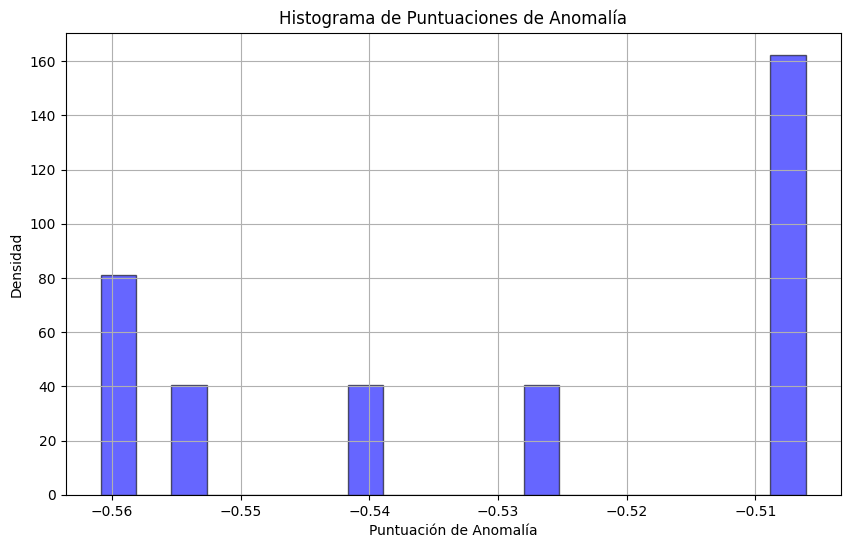

In [12]:
import matplotlib.pyplot as plt

# Obtener las puntuaciones de anomalía para todas las muestras en el conjunto de datos
anomaly_scores = isolation_forest_model.score_samples(X)

# Graficar las puntuaciones de anomalía
plt.figure(figsize=(10, 6))
plt.hist(anomaly_scores, bins=20, density=True, alpha=0.6, color='b', edgecolor='black')
plt.xlabel('Puntuación de Anomalía')
plt.ylabel('Densidad')
plt.title('Histograma de Puntuaciones de Anomalía')
plt.grid(True)
plt.show()

El anterior modelo parece ofrecer resultados no concluyentes, por lo que seguiremos probando otros modelos con el fin de poder llegar a una conclusión.

# Modelo VAE (Variational Autoencoder)

Vamos a tratar de aplicar otro tipo de modelo para poder experimentar y contrastar los resultados entre diferentes tipos de modelos. En este caso, aplicaremos un modelo conocido como "Variational Autoencoder". 

Un modelo VAE (Variational Autoencoder) es un tipo de red neuronal generativa que combina técnicas de autoencoder con inferencia variacional para aprender una representación latente continua y generar datos similares a los de su entrada. Funciona en dos etapas: un codificador que convierte los datos en una representación más simple y un decodificador que reconstruye los datos originales desde esa representación. Lo especial del VAE es que, en lugar de solo aprender una compresión fija, aprende a generar una variedad de posibles representaciones, permitiendo crear nuevos datos similares a los originales.

Aprovecharemos por tanto este principio para tratar de inferir la reconstrucción de las secuencias de eventos sobre la que determinar el error de reconstrucción y con ello, la bondad del modelo para el objetivo de detectar esas anomalías en los casos en los que el error de reconstrucción sea mayor que un umbral determinado por experimentación, ya sea mediante una constante, o mediante percentiles, suponiendo un % de anomalías en la muestra.

In [13]:
%pip install tensorflow
%pip install numpy

^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:\\Python311\\Scripts\\markdown_py.exe' -> 'c:\\Python311\\Scripts\\markdown_py.exe.deleteme'



     ---------------------------------------- 0.0/46.2 kB ? eta -:--:--
     ----------------------------------- ---- 41.0/46.2 kB ? eta -:--:--
     ---------------------------------------- 46.2/46.2 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/377.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/377.0 MB 4.1 MB/s eta 0:01:33
   ---------------------------------------- 0.2/377.0 MB 2.6 MB/s eta 0:02:23
   ---------------------------------------- 0.2/377.0 MB 1.5 MB/s eta 0:04:16
   ---------------------------------------- 0.3/377.0 MB 1.8 MB/s eta 0:03:35
   ---------------------------------------- 0.3/377.0 MB 1.8 MB/s eta 0:03:35
   ---------------------------------------- 0.5/377.0 MB 1.7 MB/s eta 0:03:47
   ---------------------------------------- 0.5/377.0 MB 1.6 MB/s eta 0:03:55
   ---------------------------------------- 0.5/377.0 MB 1.6 MB/s eta 0:03:55
   ---------------------------------------- 0.6/377.0 MB 1.5 MB/s eta 0:04:15
  

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
import tensorflow.keras.backend as K

In [ ]:
# Ejemplo de DataFrame de datos
data = {
    'Dia': [1, 1, 1, 2, 2, 3],
    'Hora': ['08:00', '09:00', '11:00', '08:00', '11:00', '09:00'],
    'Tipo de Evento': ['Evento A', 'Evento A', 'Evento C', 'Evento A', 'Evento C', 'Evento B'],
    'Ubicación del Evento': ['Ubicación 1', 'Ubicación 1', 'Ubicación 2', 'Ubicación 1', 'Ubicación 2', 'Ubicación 3']
}

# Convertir a DataFrame de pandas
df = pd.DataFrame(data)

# Convertir la columna 'Hora' a tipo datetime y normalizar las horas
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M')
scaler = StandardScaler()
df['Hora'] = scaler.fit_transform(df[['Hora']].apply(lambda x: x.dt.hour).astype(float))

# Mapear los eventos y ubicaciones a números usando LabelEncoder
label_encoder_evento = LabelEncoder()
label_encoder_ubicacion = LabelEncoder()

df['Tipo de Evento'] = label_encoder_evento.fit_transform(df['Tipo de Evento'])
df['Ubicación del Evento'] = label_encoder_ubicacion.fit_transform(df['Ubicación del Evento'])

# Obtener las secuencias de eventos para cada día
secuencias_por_dia = []
for dia, group_df in df.groupby('Dia'):
    secuencia_dia = group_df[['Hora', 'Tipo de Evento', 'Ubicación del Evento']].values.tolist()
    secuencias_por_dia.append(secuencia_dia)

# Convertir las secuencias en un arreglo numpy
secuencias_np = [np.array(secuencia) for secuencia in secuencias_por_dia]

In [ ]:
# Definir una secuencia de eventos habitual
secuencia_habitual = [
    ('08:00', 'Evento A', 'Ubicación 1'),
    ('08:30', 'Evento B', 'Ubicación 2'),
    ('08:45', 'Evento A', 'Ubicación 1'),
    ('09:00', 'Evento C', 'Ubicación 3'),
    ('09:30', 'Evento A', 'Ubicación 1'),
]

# Generar variaciones habituales de la secuencia habitual
def generar_variacion_habitual(secuencia_habitual):
    variacion_habitual = []
    for hora, evento, ubicacion in secuencia_habitual:
        # Calcular el rango de tiempo dentro de +/- 15 minutos en segundos
        rango_tiempo = 15 * 60  # 15 minutos en segundos
        rango_min = max(0, int(hora[:2]) * 3600 + int(hora[3:]) * 60 - rango_tiempo)
        rango_max = min(24 * 3600 - 60, int(hora[:2]) * 3600 + int(hora[3:]) * 60 + rango_tiempo)
        
        # Generar una nueva hora aleatoria dentro del rango especificado
        nueva_hora_segundos = np.random.randint(rango_min, rango_max)
        nueva_hora_horas = nueva_hora_segundos // 3600
        nueva_hora_minutos = (nueva_hora_segundos % 3600) // 60
        nueva_hora = f"{nueva_hora_horas:02d}:{nueva_hora_minutos:02d}"
        
        variacion_habitual.append((nueva_hora, evento, ubicacion))
    return variacion_habitual

# Generar variaciones anómalas de la secuencia habitual
def generar_variacion_anomala(secuencia_habitual):
    variacion_anomala = []
    for hora, evento, ubicacion in secuencia_habitual:
        # Probabilidad de que un evento anómalo ocurra
        if np.random.rand() < 0.4:
            # Generar un evento anómalo
            eventos_posibles = ['Evento A', 'Evento B', 'Evento C']
            nuevo_evento = np.random.choice(eventos_posibles)
            variacion_anomala.append((hora, nuevo_evento, ubicacion))

    return variacion_anomala

# Mostrar la secuencia habitual y algunas variaciones
print("Secuencia Habitual:")
print(secuencia_habitual)

print("\nVariación Habitual:")
variacion_habitual = generar_variacion_habitual(secuencia_habitual)
print(variacion_habitual)

print("\nVariación Anómala:")
variacion_anomala = generar_variacion_anomala(secuencia_habitual)
print(variacion_anomala)

Secuencia Habitual:
[('08:00', 'Evento A', 'Ubicación 1'), ('08:30', 'Evento B', 'Ubicación 2'), ('08:45', 'Evento A', 'Ubicación 1'), ('09:00', 'Evento C', 'Ubicación 3'), ('09:30', 'Evento A', 'Ubicación 1')]

Variación Habitual:
[('07:56', 'Evento A', 'Ubicación 1'), ('08:24', 'Evento B', 'Ubicación 2'), ('08:57', 'Evento A', 'Ubicación 1'), ('09:05', 'Evento C', 'Ubicación 3'), ('09:28', 'Evento A', 'Ubicación 1')]

Variación Anómala:
[('09:00', 'Evento C', 'Ubicación 3'), ('09:30', 'Evento A', 'Ubicación 1')]


In [ ]:
secuencias = secuencia_habitual + variacion_habitual 
for i in range(1000):
    variacion_habitual = generar_variacion_habitual(secuencia_habitual)
    secuencias = secuencias + variacion_habitual

In [ ]:
df = pd.DataFrame(secuencias, columns=['Hora', 'Tipo de Evento', 'Ubicación del Evento'])

# Convertir la columna 'Hora' a tipo datetime
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M')

# Normalizar las horas
scaler = StandardScaler()
df['Hora'] = scaler.fit_transform(df[['Hora']].apply(lambda x: x.dt.hour).astype(float))

# Mapear los eventos y ubicaciones a números usando LabelEncoder
label_encoder_evento = LabelEncoder()
label_encoder_ubicacion = LabelEncoder()

df['Tipo de Evento'] = label_encoder_evento.fit_transform(df['Tipo de Evento'])
df['Ubicación del Evento'] = label_encoder_ubicacion.fit_transform(df['Ubicación del Evento'])

# Crear modelo Variational Autoencoder (VAE)
input_dim = df.shape[1]
latent_dim = 2  # Dimensión latente (puedes ajustarla según sea necesario)

input_layer = Input(shape=(input_dim,))
encoder = Dense(32, activation='relu')(input_layer)
z_mean = Dense(latent_dim)(encoder)
z_log_var = Dense(latent_dim)(encoder)

# Función para muestreo de la distribución latente
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

decoder = Dense(32, activation='relu')(z)
output_layer = Dense(input_dim, activation='sigmoid')(decoder)

vae = Model(input_layer, output_layer)

In [ ]:
# Compilar el modelo VAE
vae.compile(optimizer='adam', loss='mse')

# Entrenar el modelo VAE
vae.fit(df, df, epochs=400, batch_size=32, verbose=1)

In [ ]:
# Obtener la secuencia de eventos del día actual con la hora correspondiente y normalizar las horas
eventos_dia_actual = [
    ('08:00', 'Evento A', 'Ubicación 1'),
    ('08:15', 'Evento B', 'Ubicación 2'),
    ('08:30', 'Evento A', 'Ubicación 1'),
    ('08:45', 'Evento C', 'Ubicación 3'),
    ('09:00', 'Evento A', 'Ubicación 1'),
]

# Convertir la hora a formato datetime y extraer las horas
horas = pd.to_datetime([evento[0] for evento in eventos_dia_actual], format='%H:%M').hour

# Normalizar las horas
scaler = StandardScaler()
horas_normalized = scaler.fit_transform(horas.to_numpy().reshape(-1, 1)).flatten()


eventos_numericos = label_encoder_evento.transform([evento[1] for evento in eventos_dia_actual])
ubicaciones_numericas = label_encoder_ubicacion.transform([evento[2] for evento in eventos_dia_actual])

eventos_dia_actual_transformed = np.column_stack((horas_normalized, eventos_numericos, ubicaciones_numericas))


In [ ]:
# Reconstruir la secuencia de eventos del día actual usando el modelo VAE
eventos_dia_actual_reconstructed = vae.predict(eventos_dia_actual_transformed)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


In [ ]:
# Calcular la diferencia entre la secuencia original y la reconstruida
diferencia = np.mean(np.abs(eventos_dia_actual_transformed - eventos_dia_actual_reconstructed), axis=1)

# Establecer un umbral para detectar anomalías
umbral = 0.5  # Ajusta este valor según sea necesario

# Identificar eventos anómalos
eventos_anomalos_indices = np.where(diferencia > umbral)[0]

# Verificar la ausencia de eventos en la secuencia del día actual
eventos_faltantes_indices = np.where(np.isnan(eventos_dia_actual_transformed).any(axis=1))[0]

# Combinar eventos anómalos y faltantes en una lista
eventos_anomalos_total_indices = np.concatenate([eventos_anomalos_indices, eventos_faltantes_indices])

if len(eventos_anomalos_total_indices) > 0:
    print("Se han detectado anomalías en la secuencia de eventos del día actual.")
    print("Índices de eventos anómalos o faltantes:", eventos_anomalos_total_indices)
else:
    print("No se han detectado anomalías en la secuencia de eventos del día actual.")


Se han detectado anomalías en la secuencia de eventos del día actual.
Índices de eventos anómalos o faltantes: [3]


# RNN (LSTM)

En este caso trataremos de poner en práctica el modelo conocido como Long Short-Term Memory Recurrent Neural Network. Una RNN LSTM (Long Short-Term Memory Recurrent Neural Network) es un tipo de red neuronal diseñada para manejar secuencias de datos y recordar información a lo largo de períodos más largos. Funciona con "celdas" que tienen mecanismos especiales para mantener y actualizar información. Cada celda LSTM decide, en cada paso de tiempo, si debe almacenar, usar o borrar la información basada en tres puertas: una puerta de entrada, una puerta de salida y una puerta de olvido. Esto permite que la red aprenda patrones a lo largo de secuencias más largas, como frases en un texto o pasos en una serie temporal, haciendo que sea muy efectiva para tareas como la predicción de series temporales.

Puesto que estamos trabajando con una serie temporal de eventos, donde entendemos que de manera diaria y normalizada, se sigue una rutina (aunque pueda variar), el uso de este tipo de modelos para la detección de esas anomalías comparando la secuencia de eventos real con la reconstruida, puede ser una buena técnica para detectar precisamente aquellas secuencias cuya reconstrucción difiera de la real, entendiéndose por tanto como una posible anomalía.

In [69]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import mean_squared_error

import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# Conjunto de datos histórico
conjunto = [
    [["08:30","Inicio sesión","Oficina A"],["09:15","Acceso a base de datos","Oficina A"],["10:00","Cierre sesión","Oficina A"]],
    [["08:45","Inicio sesión","Oficina B"],["09:30","Envío de correo electrónico","Oficina B"],["11:00","Cierre sesión","Oficina B"]],
    [["09:00","Inicio sesión","Oficina C"],["09:45","Consulta de informes","Oficina C"],["10:30","Cierre sesión","Oficina C"]],
]

# Eventos del día actual
eventos_dia_actual = [["08:30","Inicio sesión","Oficina A"],["09:15","Acceso a base de datos","Oficina A"],["10:00","Cierre sesión","Oficina A"]]

def transformar_datos(datos):
    encoder = OneHotEncoder()
    scaler = StandardScaler()

    # Aplicar OneHotEncoding a las características categóricas
    categoricas = np.array([[evento[1], evento[2]] for dia in datos for evento in dia])
    categoricas_encoded = encoder.fit_transform(categoricas)

    # Convertir la hora a un formato numérico para la normalización
    horas = np.array([[int(evento[0].split(':')[0])] for dia in datos for evento in dia])
    horas_normalizadas = scaler.fit_transform(horas)

    # Unir las características codificadas y normalizadas
    datos_transformados = np.hstack((categoricas_encoded.toarray(), horas_normalizadas))

    return datos_transformados

In [ ]:
# Ejemplo de datos de entrada (reemplaza esto con tus datos reales)
# X_train debe ser una lista de secuencias, donde cada secuencia es una matriz de eventos
X_train = [
    np.random.rand(np.random.randint(5, 10), 9),  # Secuencia 1 con 5-10 eventos y 9 características
    np.random.rand(np.random.randint(10, 15), 9),  # Secuencia 2 con 10-15 eventos y 9 características
    np.random.rand(np.random.randint(7, 12), 9)  # Secuencia 3 con 7-12 eventos y 9 características
]
y_train = np.random.rand(3, 1)  # Ejemplo de objetivos para las secuencias

# Convertir la lista de secuencias en un array de numpy
X_train_array = [np.array(x) for x in X_train]

# Rellenar secuencias para igualar las longitudes
X_train_padded = pad_sequences(X_train_array, padding='post', dtype='float32')

# Crear y entrenar el modelo LSTM
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_padded.shape[1], X_train_padded.shape[2])))  # Forma correcta de entrada
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# Ajustar el modelo
model.fit(X_train_padded, y_train, epochs=10, batch_size=32)

In [ ]:
# Ahora puedes usar el modelo entrenado para hacer predicciones
# Ejemplo de cómo predecir una nueva secuencia de eventos
new_sequence = np.random.rand(np.random.randint(7, 12), 9)  # Nueva secuencia con 7-12 eventos y 9 características
new_sequence_padded = pad_sequences([new_sequence], maxlen=X_train_padded.shape[1], padding='post', dtype='float32')

# Realizar la predicción
prediction = model.predict(new_sequence_padded)

# Imprimir la predicción
print("Predicción para la nueva secuencia:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
Predicción para la nueva secuencia: [[0.63067704]]


In [ ]:
# Generar datos sintéticos con una secuencia regular y una anomalía
seq_length = 1000
normal_pattern = np.sin(np.linspace(0, 10, seq_length))
anomaly_start = 700
anomaly_end = 800
anomaly_pattern = 2 * np.sin(np.linspace(0, 5, anomaly_end - anomaly_start))

data = np.concatenate([normal_pattern, anomaly_pattern, normal_pattern[anomaly_end:]])

# Crear secuencias y etiquetas para entrenamiento
sequence_length = 10
sequences = []
labels = []
for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    if i >= anomaly_start and i < anomaly_end:
        labels.append(1)  # Etiqueta 1 para anomalía
    else:
        labels.append(0)  # Etiqueta 0 para secuencia normal

# Convertir a numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)

# Dividir datos en conjuntos de entrenamiento y prueba
split_ratio = 0.8
split_index = int(split_ratio * len(sequences))

x_train, x_test = sequences[:split_index], sequences[split_index:]
y_train, y_test = labels[:split_index], labels[split_index:]

# Definir el modelo LSTM
model = keras.Sequential([
    layers.LSTM(64, input_shape=(sequence_length, 1)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# Entrenar el modelo
model.fit(x_train[..., np.newaxis], y_train, epochs=100, batch_size=32, verbose=1)

# Evaluar el modelo en datos de prueba
loss, accuracy = model.evaluate(x_test[..., np.newaxis], y_test, verbose=1)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Hacer predicciones en todo el conjunto de datos
predictions = model.predict(sequences[..., np.newaxis])

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data')
plt.plot(np.arange(sequence_length, len(predictions) + sequence_length), predictions, label='Predictions')
plt.axvspan(anomaly_start, anomaly_end, color='red', alpha=0.3, label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
# Generar secuencias aleatorias de diferentes longitudes
np.random.seed(0)
secuencias = []
longitudes = np.random.randint(5, 15, size=10)  # Generar 10 longitudes aleatorias entre 5 y 15
for longitud in longitudes:
    secuencia = np.random.randn(longitud, 1)  # Generar secuencia de números aleatorios
    secuencias.append(secuencia)

# Obtener la longitud máxima de las secuencias
longitud_maxima = max(map(len, secuencias))

# Rellenar las secuencias para que tengan la misma longitud
secuencias_rellenadas = tf.keras.preprocessing.sequence.pad_sequences(secuencias, maxlen=longitud_maxima, dtype='float32', padding='post')

# Crear un modelo LSTM con modelo dinámico
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(longitud_maxima, 1)))  # Máscara para ignorar los ceros de relleno
model.add(LSTM(64))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Entrenar el modelo
y_train = np.random.rand(len(secuencias), 1)  # Generar objetivos aleatorios para el ejemplo
model.fit(secuencias_rellenadas, y_train, epochs=50, verbose=1)

# Evaluar el modelo
loss = model.evaluate(secuencias_rellenadas, y_train, verbose=0)
print(f'Loss: {loss}')

# Hacer predicciones
predicciones = model.predict(secuencias_rellenadas)
print('Predicciones:')
for i, prediccion in enumerate(predicciones):
    print(f'Secuencia {i + 1}: {prediccion.flatten()}')

In [ ]:
# Generar secuencias aleatorias de eventos con hora, tipo y ubicación
np.random.seed(0)
secuencias = []
longitudes = np.random.randint(5, 15, size=10)  # Generar 10 longitudes aleatorias entre 5 y 15
for longitud in longitudes:
    secuencia = []
    for _ in range(longitud):
        hora = f"{np.random.randint(0, 24):02d}:{np.random.randint(0, 60):02d}"
        tipo = np.random.choice(['A', 'B', 'C'])
        ubicacion = np.random.choice(['Lugar 1', 'Lugar 2', 'Lugar 3'])
        evento = (hora, tipo, ubicacion)
        secuencia.append(evento)
    secuencias.append(secuencia)

# Obtener la longitud máxima de las secuencias
longitud_maxima = max(map(len, secuencias))

# Convertir las secuencias a formato numérico
def convertir_secuencias(secuencias, longitud_maxima):
    secuencias_numeros = []
    for secuencia in secuencias:
        secuencia_numeros = []
        for evento in secuencia:
            hora_num = int(evento[0][:2]) + int(evento[0][3:]) / 60.0
            tipo_num = {'A': 0, 'B': 1, 'C': 2}[evento[1]]
            ubicacion_num = {'Lugar 1': 0, 'Lugar 2': 1, 'Lugar 3': 2}[evento[2]]
            evento_numeros = [hora_num, tipo_num, ubicacion_num]
            secuencia_numeros.append(evento_numeros)
        secuencia_numeros += [[0, 0, 0]] * (longitud_maxima - len(secuencia))  # Rellenar con ceros
        secuencias_numeros.append(secuencia_numeros)
    return np.array(secuencias_numeros)

secuencias_numeros = convertir_secuencias(secuencias, longitud_maxima)

# Crear un modelo LSTM con modelo dinámico
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(longitud_maxima, 3)))  # Máscara para ignorar los ceros de relleno
model.add(LSTM(64))
model.add(Dense(1))

# Compilar el modelo
model.compile(loss='mean_squared_error', optimizer='adam')

# Generar objetivos aleatorios para el ejemplo
y_train = np.random.rand(len(secuencias), 1)

# Entrenar el modelo
model.fit(secuencias_numeros, y_train, epochs=50, verbose=1)

# Evaluar el modelo
loss = model.evaluate(secuencias_numeros, y_train, verbose=0)
print(f'Loss: {loss}')

# Hacer predicciones
predicciones = model.predict(secuencias_numeros)
print('Predicciones:')
for i, prediccion in enumerate(predicciones):
    print(f'Secuencia {i + 1}: {prediccion.flatten()}')

In [ ]:
# Función para generar secuencias de eventos aleatorias
def generar_secuencias_aleatorias(num_secuencias, longitud_maxima):
    secuencias = []
    for _ in range(num_secuencias):
        longitud = np.random.randint(5, longitud_maxima)
        secuencia = []
        for _ in range(longitud):
            hora = f"{np.random.randint(0, 24):02d}:{np.random.randint(0, 60):02d}"
            tipo = np.random.choice(['A', 'B', 'C'])
            ubicacion = np.random.choice(['Lugar 1', 'Lugar 2', 'Lugar 3'])
            evento = (hora, tipo, ubicacion)
            secuencia.append(evento)
        secuencias.append(secuencia)
    return secuencias

# Función para convertir secuencias de eventos a formato numérico
def convertir_secuencias(secuencias, longitud_maxima):
    secuencias_numeros = []
    for secuencia in secuencias:
        secuencia_numeros = []
        for evento in secuencia:
            hora_num = int(evento[0][:2]) + int(evento[0][3:]) / 60.0
            tipo_num = {'A': 0, 'B': 1, 'C': 2}[evento[1]]
            ubicacion_num = {'Lugar 1': 0, 'Lugar 2': 1, 'Lugar 3': 2}[evento[2]]
            evento_numeros = [hora_num, tipo_num, ubicacion_num]
            secuencia_numeros.append(evento_numeros)
        secuencia_numeros += [[0, 0, 0]] * (longitud_maxima - len(secuencia))  # Rellenar con ceros
        secuencias_numeros.append(secuencia_numeros)
    return np.array(secuencias_numeros)

# Generar secuencias de eventos aleatorias
np.random.seed(0)
num_secuencias = 100
longitud_maxima = 20
secuencias_normales = generar_secuencias_aleatorias(num_secuencias, longitud_maxima)

# Introducir secuencias anómalas
secuencia_anomala = [('23:59', 'A', 'Lugar 1'), ('00:01', 'B', 'Lugar 2')]
secuencias_normales.append(secuencia_anomala)

# Convertir secuencias a formato numérico
secuencias_numeros = convertir_secuencias(secuencias_normales, longitud_maxima)

# Etiquetas: 0 para secuencias normales, 1 para secuencias anómalas
y_train = np.zeros(num_secuencias + 1)
y_train[-1] = 1

# Crear un modelo LSTM con modelo dinámico
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(longitud_maxima, 3)))  # Máscara para ignorar los ceros de relleno
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))  # Utilizamos sigmoid para clasificación binaria

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(secuencias_numeros, y_train, epochs=50, verbose=1)

# Hacer predicciones
predicciones = model.predict(secuencias_numeros)
predicciones_binarias = (predicciones > 0.4).flatten().astype(int)
print('Predicciones binarias:')
for i, prediccion in enumerate(predicciones_binarias):
    print(f'Secuencia {i + 1}: {"Anómala" if prediccion == 1 else "Normal"}')

En este caso, podemos observar como hemos generado una secuencia con un patrón de eventos que hemos considerado como habitual, y a introducir manualmente una secuencia que sabemos que debería ser anómala (concretamente la última) vemos como el modelo es capaz de detectarlo.

In [ ]:
secuencias_normales = [
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
]


# Función para convertir secuencias de eventos a formato numérico
def convertir_secuencias(secuencias, longitud_maxima):
    secuencias_numeros = []
    for secuencia in secuencias:
        secuencia_numeros = []
        for evento in secuencia:
            hora_num = int(evento[0][:2]) + int(evento[0][3:]) / 60.0
            tipo_num = {'A': 1, 'B': 2, 'C': 3}[evento[2]]
            ubicacion_num = {'Lugar 1': 1, 'Lugar 2': 2, 'Lugar 3': 3}[evento[1]]
            evento_numeros = [hora_num, tipo_num, ubicacion_num]
            secuencia_numeros.append(evento_numeros)
        secuencia_numeros += [[0, 0, 0]] * (longitud_maxima - len(secuencia))  # Rellenar con ceros
        secuencias_numeros.append(secuencia_numeros)
    return np.array(secuencias_numeros)


# Generar secuencias de eventos aleatorias
np.random.seed(0)
num_secuencias = 1000
longitud_maxima = 8
secuencias = secuencias_normales # generar_secuencias_aleatorias(num_secuencias, longitud_maxima)

# Convertir secuencias a formato numérico
secuencias_numeros = convertir_secuencias(secuencias, longitud_maxima)

# Crear un modelo LSTM con modelo dinámico para reconstrucción de secuencias
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(longitud_maxima, 3)))  # Máscara para ignorar los ceros de relleno
model.add(LSTM(64, return_sequences=True))  # Devolver secuencias completas
model.add(Dense(3))  # Capa de salida para reconstrucción
model.compile(loss='mse', optimizer='adam')

# Entrenar el modelo para la reconstrucción de secuencias
model.fit(secuencias_numeros, secuencias_numeros, epochs=1000, verbose=1)

# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas = model.predict(secuencias_numeros)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion = np.mean(np.abs(secuencias_numeros - secuencias_reconstruidas), axis=(1, 2))

# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia = np.percentile(errores_reconstruccion, 95)

# Identificar secuencias anómalas
secuencias_anomalas = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion) if error > umbral_anomalia]

# Mostrar secuencias anómalas
print('Secuencias Anómalas:')
for i, secuencia_anomala in enumerate(secuencias_anomalas):
    print(f'Secuencia {i + 1}: {secuencia_anomala}')


Introducimos ahora un conjunto de secuencias anómalas para tratar de ver si el modelo es capaz de identificarlas.

In [ ]:
secuencias_anomalas = [
    [("08:00", "Lugar 2", "B"),("09:00", "Lugar 2", "B"),("10:00", "Lugar 2", "B"),("12:00", "Lugar 2", "B"),("12:00", "Lugar 2", "B"),("13:00", "Lugar 2", "B"),("14:00", "Lugar 2", "B"),("15:00", "Lugar 2", "B")],
    [("09:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("09:00", "Lugar 3", "B"),("09:00", "Lugar 2", "B"),("09:00", "Lugar 1", "B"),("09:00", "Lugar 3", "A"),("09:00", "Lugar 3", "A"),("09:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    [("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C")],
    []
]

secuencias_numeros = convertir_secuencias(secuencias_anomalas, longitud_maxima)

# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas = model.predict(secuencias_numeros)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion = np.mean(np.abs(secuencias_numeros - secuencias_reconstruidas), axis=(1, 2))
print(errores_reconstruccion)

# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia = np.percentile(errores_reconstruccion, 95)
print(umbral_anomalia)
# Usamos mejor un valor fijo para no condicionar la anomalía por el número de la muestra,
# ya que presuponemos que podemos pasar una sola secuencia, y con el P95 no la marcaría como anomalía por el error
umbral_anomalia = 0.3

# Identificar secuencias anómalas
secuencias_anomalas = [secuencia for secuencia, error in zip(secuencias_anomalas, errores_reconstruccion) if error > umbral_anomalia]

# Mostrar secuencias anómalas
print('Secuencias Anómalas:')
for i, secuencia_anomala in enumerate(secuencias_anomalas):
    print(f'Secuencia {i + 1}: {secuencia_anomala}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
[0.38592468 0.86158751 0.06039868 0.06039868 0.07583263]
0.7664549479881921
Secuencias Anómalas:
Secuencia 1: [('08:00', 'Lugar 2', 'B'), ('09:00', 'Lugar 2', 'B'), ('10:00', 'Lugar 2', 'B'), ('12:00', 'Lugar 2', 'B'), ('12:00', 'Lugar 2', 'B'), ('13:00', 'Lugar 2', 'B'), ('14:00', 'Lugar 2', 'B'), ('15:00', 'Lugar 2', 'B')]
Secuencia 2: [('09:00', 'Lugar 1', 'A'), ('09:00', 'Lugar 1', 'C'), ('09:00', 'Lugar 3', 'B'), ('09:00', 'Lugar 2', 'B'), ('09:00', 'Lugar 1', 'B'), ('09:00', 'Lugar 3', 'A'), ('09:00', 'Lugar 3', 'A'), ('09:00', 'Lugar 2', 'C')]


Podemos percatarnos de que este modelo funciona bien para detección de eventos y patrones anómalos, pero presenta un problema derivado de las transformaciones necesarias a realizar a los datos para entrenar el modelo. 
En primer lugar, debemos de tener en cuenta la naturaleza de los datos ya que las secuencias de eventos (las cuales se corresponden con los eventos de un mismo día o intervalo horario) no tienen por que tener el mismo número de eventos. Esto hace que tengamos que o bien completar las secuencias para que todas tengan la misma longuitud y poder entrenar el modelo LSTM. Como estrategia para completar las secuencias, podemos o bien completar con ceros y aplicar una máscara de entrada a la red para que no se centre y de valor a estos datos; o bien completamos con un tipo de evento inventado que designe que no ha ocurrido evento. Esto lo hacemos de manera correlada con las unidades de tiempo e intervalos establecidos. 

En esta primera aproximación del modelo, estamos creando secuencias de 8 horas a intervalos de 1h, lo que quiere decir que estamos en un caso no muy representativo de la realidad, puesto que estamos resumiendo los posibles eventos que se producen en 1h a un único evento. Lo hacemos así para simplificar y hacer la prueba como concepto. Para una correcta aproximación de la realidad, deberíamos considerar establecer intervalos de tiempo menores. Aunque puede darse el caso de que en un mismo minuto se den más eventos, consideramos que no es significativa la información que se pueda aportar con una granularidad de segundos, en contraposición de las desventajas que esto aporta, puesto que provocará que la mayoría de los datos sean nulos, aumentando la muestra significativamente, con lo que ello conlleva en recursos para el entrenamiento del modelo, introducirá una gran cantidad de información que podemos considerar como ruido y que podría llegar a evitar que el modelo centre su atención en la secuencia de eventos con información; es decir, eso puede provocar que el modelo entienda que lo normal es el evento vacío, puesto que es el evento más habitual en todas las secuencias, provocando que detecte como anómalos los eventos con información real y representativa.

In [ ]:
secuencias_normales = [
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
    [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
]

# Función para convertir secuencias de eventos a formato numérico
def convertir_secuencias(secuencias, longitud_maxima):
    secuencias_numeros = []
    for secuencia in secuencias:
        secuencia_numeros = []
        for evento in secuencia:
            hora_num = int(evento[0][:2]) + int(evento[0][3:]) / 60.0
            tipo_num = {'VACIO': 0, 'A': 1, 'B': 2, 'C': 3}[evento[2]]
            ubicacion_num = {'VACIO': 0, 'Lugar 1': 1, 'Lugar 2': 2, 'Lugar 3': 3}[evento[1]]
            evento_numeros = [hora_num, tipo_num, ubicacion_num]
            secuencia_numeros.append(evento_numeros)
        secuencia_numeros += [[0, 0, 0]] * (longitud_maxima - len(secuencia))  # Rellenar con ceros
        secuencias_numeros.append(secuencia_numeros)
    return np.array(secuencias_numeros)

# Generar secuencias de eventos aleatorias
np.random.seed(0)
num_secuencias = 1000
longitud_maxima = 13
secuencias = secuencias_normales # generar_secuencias_aleatorias(num_secuencias, longitud_maxima)

# Convertir secuencias a formato numérico
secuencias_numeros = convertir_secuencias(secuencias, longitud_maxima)
print(secuencias_numeros[0])

# Crear un modelo LSTM con modelo dinámico para reconstrucción de secuencias
model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(longitud_maxima, 3)))  # Máscara para ignorar los ceros de relleno
model.add(LSTM(64, return_sequences=True))  # Devolver secuencias completas
model.add(Dense(3))  # Capa de salida para reconstrucción
model.compile(loss='mse', optimizer='adam')

# Entrenar el modelo para la reconstrucción de secuencias
model.fit(secuencias_numeros, secuencias_numeros, epochs=1000, verbose=1)

# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas = model.predict(secuencias_numeros)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion = np.mean(np.abs(secuencias_numeros - secuencias_reconstruidas), axis=(1, 2))

# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia = np.percentile(errores_reconstruccion, 95)

# Identificar secuencias anómalas
secuencias_anomalas = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion) if error > umbral_anomalia]

# Mostrar secuencias anómalas
print('Secuencias Anómalas:')
for i, secuencia_anomala in enumerate(secuencias_anomalas):
    print(f'Secuencia {i + 1}: {secuencia_anomala}')

In [ ]:
secuencias_anomalas = [
        # Secuencia habitual de control
        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "VACIO", "VACIO"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],

        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "VACIO", "VACIO"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "VACIO", "VACIO"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "VACIO", "VACIO"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "VACIO", "VACIO"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "VACIO", "VACIO"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "VACIO", "VACIO"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "VACIO", "VACIO"),("13:00", "Lugar 3", "A"),("14:00", "VACIO", "VACIO"),("15:00", "VACIO", "VACIO"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],

        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "Lugar 1", "A"),("08:00", "Lugar 1", "A"),("09:00", "VACIO", "VACIO"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "VACIO", "VACIO"),("13:00", "Lugar 3", "A"),("14:00", "VACIO", "VACIO"),("15:00", "VACIO", "VACIO"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
        [("05:00", "VACIO", "VACIO"),("06:00", "Lugar 3", "B"),("07:00", "Lugar 1", "A"),("08:00", "Lugar 1", "A"),("09:00", "VACIO", "VACIO"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "VACIO", "VACIO"),("13:00", "Lugar 3", "A"),("14:00", "VACIO", "VACIO"),("15:00", "VACIO", "VACIO"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],

        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "VACIO", "VACIO"),("09:00", "VACIO", "VACIO"),("10:00", "VACIO", "VACIO"),("11:00", "VACIO", "VACIO"),("12:00", "VACIO", "VACIO"),("13:00", "VACIO", "VACIO"),("14:00", "VACIO", "VACIO"),("15:00", "VACIO", "VACIO"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
        
        # Secuencia habitual de control
        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "Lugar 1", "A"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],

        # Secuencia habitual de control
        [("05:00", "VACIO", "VACIO"),("06:00", "VACIO", "VACIO"),("07:00", "VACIO", "VACIO"),("08:00", "Lugar 1", "A"),("09:00", "Lugar 1", "C"),("10:00", "Lugar 3", "B"),("11:00", "Lugar 2", "B"),("12:00", "Lugar 1", "B"),("13:00", "Lugar 3", "A"),("14:00", "Lugar 3", "A"),("15:00", "Lugar 2", "C"),("16:00", "VACIO", "VACIO"),("17:00", "VACIO", "VACIO"),],
]

secuencias_numeros = convertir_secuencias(secuencias_anomalas, longitud_maxima)

# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas = model.predict(secuencias_numeros)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion = np.mean(np.abs(secuencias_numeros - secuencias_reconstruidas), axis=(1, 2))
print(errores_reconstruccion)

# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia = np.percentile(errores_reconstruccion, 95)
print(umbral_anomalia)
# Usamos mejor un valor fijo para no condicionar la anomalía por el número de la muestra,
# ya que presuponemos que podemos pasar una sola secuencia, y con el P95 no la marcaría como anomalía por el error
umbral_anomalia = 0.3

# Identificar secuencias anómalas
secuencias_anomalas = [secuencia for secuencia, error in zip(secuencias_anomalas, errores_reconstruccion) if error > umbral_anomalia]

# Mostrar secuencias anómalas
print('Secuencias Anómalas:')
for i, secuencia_anomala in enumerate(secuencias_anomalas):
    print(f'Secuencia {i + 1}: {secuencia_anomala}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[0.27674823 0.37490149 0.45822369 0.55185238 0.50125834 0.64932954
 1.03042391 0.18005067 0.05555285]
0.8779861589654897
Secuencias Anómalas:
Secuencia 1: [('05:00', 'VACIO', 'VACIO'), ('06:00', 'VACIO', 'VACIO'), ('07:00', 'VACIO', 'VACIO'), ('08:00', 'Lugar 1', 'A'), ('09:00', 'VACIO', 'VACIO'), ('10:00', 'Lugar 3', 'B'), ('11:00', 'Lugar 2', 'B'), ('12:00', 'VACIO', 'VACIO'), ('13:00', 'Lugar 3', 'A'), ('14:00', 'Lugar 3', 'A'), ('15:00', 'Lugar 2', 'C'), ('16:00', 'VACIO', 'VACIO'), ('17:00', 'VACIO', 'VACIO')]
Secuencia 2: [('05:00', 'VACIO', 'VACIO'), ('06:00', 'VACIO', 'VACIO'), ('07:00', 'VACIO', 'VACIO'), ('08:00', 'Lugar 1', 'A'), ('09:00', 'VACIO', 'VACIO'), ('10:00', 'Lugar 3', 'B'), ('11:00', 'Lugar 2', 'B'), ('12:00', 'VACIO', 'VACIO'), ('13:00', 'Lugar 3', 'A'), ('14:00', 'Lugar 3', 'A'), ('15:00', 'VACIO', 'VACIO'), ('16:00', 'VACIO', 'VACIO'), ('17:00', 'VACIO', 'VACIO')]
Secuencia 3: [('05:00', 'VACIO', 'VACIO'), ('06:00', 'VACIO'

Al introducir la componente de evento "vacio", notamos una clara mejora del modelo, detectando como anómalias aquellas secuencias donde no se dan los eventos habituales, corrigiendo al mismo tiempo el que ello afecte a detectar como anómalas las secuencias habituales que en el anterior caso, al completar las secuencias con ceros, provocaba que el modelo no centrase su atención en los eventos reales al estar en minoría.

# Detección de anomalías en patrones de comportamiento mediante modelos LSTM (Pruebas sobre datos reales de usuarios)
## Preprocesamiento de datos
### Agregamos el campo de fecha-completo previo a poder resumir y agrupar los eventos

In [28]:
import pandas as pd
from datetime import datetime, timedelta

In [43]:
def preprocessFileData(filePath, outputPath):
    # Leer el archivo CSV
    df = pd.read_excel(filePath, header=0)
    

    # Convertir la columna 'event-time' a formato datetime
    df['event-datetime'] = pd.to_datetime(df['event-time'], format='%H:%M:%S', errors='coerce')

    # Eliminar filas con valores de fecha nulos (valores vacíos)
    df = df.dropna(subset=['event-datetime', "event-id"])

    # Inicializar la variable para almacenar la fecha del día anterior
    fecha_anterior = None

    # Lista para almacenar las secuencias por día
    secuencias = []
    
    days = 0
    # Recorrer los datos para agruparlos por día
    for _, row in df.iterrows():
        if fecha_anterior is None or row['event-datetime'].time() > fecha_anterior.time():
            # Crear una nueva secuencia para el nuevo día
            nueva_secuencia = {
                'fecha': row['event-datetime'].date() - timedelta(days=days),
                'eventos': [row.to_dict()]  # Convertir la fila a un diccionario y añadirlo a los datos del día
            }
            days += 1
            secuencias.append(nueva_secuencia)
        else:
            # Agregar la fila al día actual en la secuencia
            secuencias[-1]['eventos'].append(row.to_dict())

        fecha_anterior = row['event-datetime']


    # Añadi la columna 'full-date' a cada evento en las secuencias
    for secuencia in secuencias:
        for evento in secuencia['eventos']:
            fecha = secuencia['fecha'].strftime('%Y-%m-%d')  # Convertir la fecha a formato de cadena YYYY-MM-DD
            tiempo = evento['event-time']  # Obtener el valor de tiempo de la columna 'event-time'
            evento['full-date'] = f"{fecha} {tiempo}"

    # Convertir la lista de secuencias de nuevo a un DataFrame
    df_with_full_date = pd.concat([pd.DataFrame(secuencia['eventos']) for secuencia in secuencias], ignore_index=True)
    # Eliminar la columna 'event-datetime' del DataFrame
    df_with_full_date.drop(columns=['event-datetime'], inplace=True)

    # Guardar el DataFrame modificado en un nuevo archivo CSV
    df_with_full_date.to_csv(outputPath, index=False)

In [45]:
preprocessFileData('./data/entrada/YH-00049797-CRUDO.xlsx','./data/entrada/YH-00049797-CRUDO_with_date.csv')

### Homogeneizamos la longitud de las secuencias de eventos para cada día
Para ello establecemos intervalos de tiempo de manera que nos quedamos con el evento más repetido en dicho intervalo, o creamos un evento vacío en caso de no haberse dado ningún evento.

In [ ]:
def resumeDataByIntervals(filePath, outputPath, intervalSec):
    # Cargar el archivo CSV
    df = pd.read_csv(filePath, header=0)

    # Convertir la columna 'full-date' a tipo datetime
    df['full-date'] = pd.to_datetime(df['full-date'])

    # Ordenar por fecha descendente
    df = df.sort_values(by='full-date', ascending=False)

    # Obtener la fecha más reciente y la fecha más lejana en el archivo
    fecha_mas_reciente = df.iloc[0]['full-date']
    fecha_mas_lejana = df.iloc[-1]['full-date']

    # Crear una lista de intervalos de x segundos desde las (00:00:00-secs) hasta las 00:00:00 del día más reciente
    intervalos = []
    fecha_inicial = datetime.combine(fecha_mas_reciente.date(), datetime.strptime('23:00:00', '%H:%M:%S').time())
    fecha_final = datetime.combine(fecha_mas_lejana.date(), datetime.strptime('00:00:00', '%H:%M:%S').time())

    while fecha_inicial >= fecha_final:
        intervalos.append(fecha_inicial.strftime('%Y-%m-%d %H:%M:%S'))
        fecha_inicial -= timedelta(seconds=intervalSec)

    # Función para obtener los eventos dentro del intervalo superior
    def obtener_eventos_intervalo_superior(intervalo):
        fecha_inferior = datetime.strptime(intervalo, '%Y-%m-%d %H:%M:%S')
        fecha_superior = fecha_inferior + timedelta(seconds=intervalSec)
        eventos_en_intervalo = df[(df['full-date'] >= fecha_inferior) & (df['full-date'] < fecha_superior)]
        return eventos_en_intervalo

    # Función para obtener el evento más repetido dentro del intervalo
    def obtener_evento_mas_repetido(intervalo):
        eventos_en_intervalo = obtener_eventos_intervalo_superior(intervalo)
        if not eventos_en_intervalo.empty:
            evento_mas_repetido = eventos_en_intervalo['event-id'].mode().iloc[0]
            evento_seleccionado = eventos_en_intervalo[eventos_en_intervalo['event-id'] == evento_mas_repetido].iloc[0]
            evento_seleccionado['intervalo'] = intervalo
            return evento_seleccionado
        else:
            evento_vacio = pd.Series(['vacio'] * len(df.columns), index=df.columns)
            evento_vacio['full-date'] = intervalo
            evento_vacio['intervalo'] = intervalo
            evento_vacio['event-id'] = 0
            return evento_vacio

    # Crear un DataFrame para almacenar los eventos seleccionados
    df_resumido = pd.DataFrame(columns=df.columns.tolist() + ['intervalo'])

    # Iterar sobre los intervalos y obtener los eventos del intervalo superior para cada uno
    for intervalo in intervalos:
        evento_seleccionado = obtener_evento_mas_repetido(intervalo)
        df_resumido = pd.concat([df_resumido, pd.DataFrame([evento_seleccionado])], ignore_index=True)

    # Guardar el DataFrame resultante en un nuevo archivo CSV
    df_resumido.to_csv(outputPath, index=False)

In [ ]:
interval_sec = (60*60)
resumeDataByIntervals("../data/luis_enero_24_with_date.csv", "../data/luis_enero_24_resumed_3600_sec.csv", interval_sec)

## Carga de datos para aplicación del modelo LSTM

In [53]:
def loadData(filePath):
    # Cargar el archivo CSV
    archivo_csv = filePath
    df = pd.read_csv(archivo_csv, header=0)  # Indicar que la primera fila es la cabecera

    # Convertir la columna 'event-time' a formato datetime
    df['intervalo'] = pd.to_datetime(df['intervalo'], errors='coerce')

    # Eliminar filas con valores de fecha nulos (valores vacíos)
    df = df.dropna(subset=['intervalo'])

    # Extraer solo la fecha de la columna 'event-time'
    df['date'] = df['intervalo'].dt.date

    # Agrupar por la fecha y crear secuencias
    secuencias = []
    for fecha, grupo in df.groupby('date'):
        secuencia = {
            'date': fecha,
            'events': grupo.to_dict('records')  # Convertir cada grupo a un diccionario
        }
        secuencias.append(secuencia)
    
    return secuencias

In [ ]:
secuencias = loadData('../data/luis_enero_24_resumed_3600_sec.csv')

Hacemos algunas validaciones respecto a la longitud de las secuencias y los datos cargados

In [ ]:
print("Longitud de las secuencias:", len(secuencias))
print("Fecha inicial:", secuencias[0]["date"])
print("Fecha final:", secuencias[-1]["date"])
print("Evento inicial:", secuencias[0]["events"][0])
print("Eventos dia inicial:", len(secuencias[0]["events"]))
print("Eventos dia final:", len(secuencias[0]["events"]))

Longitud de las secuencias: 45
Fecha inicial: 1899-11-18
Fecha final: 1900-01-01
Evento inicial: {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '21.3W', 'event-id': 40, 'marquee-text 2': 'Enchufe salón', 'marquee-text 3': 'Casa/Salón', 'event-source-type': 'Sistema', 'event-time': '23:09:35', 'full-date': '1899-11-18 23:09:35', 'intervalo': Timestamp('1899-11-18 23:00:00'), 'date': datetime.date(1899, 11, 18)}
Eventos dia inicial: 24
Eventos dia final: 24


## Tratamiento de datos
Preparamos los datos una vez preprocesados y leídos para la entrada del modelo.

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from scipy.sparse import hstack

In [ ]:
sec_eventos = []
for sec in secuencias:
    sec_eventos.append(sec["events"])

In [ ]:
def preprocess_events(events):
    # Calcular el número de segundos transcurridos desde la medianoche
    events['seconds_since_midnight'] = events['event-interval'].dt.hour * 3600 + events['event-interval'].dt.minute * 60 + events['event-interval'].dt.second
    
    # Definir las columnas numéricas y categóricas
    numeric_cols = ['seconds_since_midnight']
    categorical_cols = ['event-source-type', 'marquee-text 2', 'marquee-text 3']
    
    # Pipeline para el preprocesamiento categórico
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])
    # Pipeline para el preprocesamiento numérico
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    # Aplicar el preprocesamiento a la columna categórica
    processed_categorical = categorical_transformer.fit_transform(events[categorical_cols])
    processed_numeric = numeric_transformer.fit_transform(events[numeric_cols])

    # Concatenar la columna procesada categórica con la columna numérica
    processed_events = hstack([processed_numeric, processed_categorical,  events['event-id'].values.reshape(-1, 1)])
    
    return processed_events

In [ ]:
def preprocessData(sec_eventos):
    # Crear un DataFrame con los eventos de ejemplo
    df_eventos = sec_eventos
    df_eventos_preprocesados_total = []

    for row in df_eventos:
        df_eventos_day = pd.DataFrame(row)
        for idx, event in df_eventos_day.iterrows():
            # Convertir el tiempo a formato datetime
            event['event-interval'] = pd.to_datetime(event['intervalo'], format='%H:%M:%S')
            # df_eventos_preprocesados_day.append(event)
            df_eventos_preprocesados_total.append(event)

    df_eventos_preprocesados_total_df = pd.DataFrame(df_eventos_preprocesados_total)
    # Preprocesar los eventos
    df_eventos_preprocesados_total_pp = preprocess_events(df_eventos_preprocesados_total_df)
    return df_eventos_preprocesados_total_pp

In [ ]:
df_eventos_preprocesados_total_pp = preprocessData(sec_eventos)

## ENTRENAMIENTO DE MODELO LSTM
Entrenamos el modelo con lo datos tratados para su entrada.

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking, Dropout
from keras.regularizers import l2

In [ ]:
print(df_eventos_preprocesados_total_pp.toarray())
print(df_eventos_preprocesados_total_pp.shape)
print(len(secuencias[0]["events"])*45)

[[ 1.66132477  1.          0.         ...  0.          0.
  40.        ]
 [ 1.51686175  1.          0.         ...  0.          0.
  40.        ]
 [ 1.37239873  1.          0.         ...  0.          0.
  40.        ]
 ...
 [-1.37239873  0.          0.         ...  1.          0.
   0.        ]
 [-1.51686175  0.          0.         ...  1.          0.
   0.        ]
 [-1.66132477  1.          0.         ...  0.          0.
  40.        ]]
(1080, 22)
1080


In [ ]:
def prepareDataForLSTMInput(df_eventos_preprocesados_total_pp):
    # Suponiendo que tu matriz se llama 'matriz' y tiene la forma (259200, 1010)
    matriz = df_eventos_preprocesados_total_pp.toarray()

    print("Longitud total:" ,df_eventos_preprocesados_total_pp.shape[0])

    # Número de filas en cada submatriz
    filas_por_submatriz = len(secuencias[0]["events"])

    # Calcula el número total de submatrices
    num_submatrices = matriz.shape[0] // filas_por_submatriz

    # Crea una lista para almacenar las submatrices
    lista_matrices = []

    # Divide la matriz en submatrices de 5670 filas
    for i in range(num_submatrices):
        inicio = i * filas_por_submatriz
        fin = inicio + filas_por_submatriz
        submatriz = matriz[inicio:fin, :]
        lista_matrices.append(submatriz)

    # Si el número total de filas no es divisible exactamente por 5670,
    # puedes agregar las filas restantes a una submatriz adicional
    resto = matriz.shape[0] % filas_por_submatriz
    if resto > 0:
        print("algo pasa, resto > 0")
        submatriz_resto = matriz[-resto:, :]
        lista_matrices.append(submatriz_resto)

    # Ahora la lista 'lista_matrices' contendrá todas las submatrices
    # Imprime la longitud de la lista para obtener el número de submatrices
    print("Número de submatrices:", len(lista_matrices))

    day_events_len = lista_matrices[0].shape[0]
    caracteristics_len = lista_matrices[0].shape[1]

    # Convertir lista_matrices a un arreglo numpy
    datos_numpy = np.array(lista_matrices)

    # Reformatar los datos para que tengan la forma (num_muestras, timesteps, features)
    datos_reshape = datos_numpy.reshape(datos_numpy.shape[0], -1, datos_numpy.shape[-1])

    return datos_reshape, day_events_len, caracteristics_len

In [ ]:
datos_reshape, day_events_len, caracteristics_len = prepareDataForLSTMInput(df_eventos_preprocesados_total_pp)

Longitud total: 1080
Número de submatrices: 45


In [ ]:
print("Número de días: ", datos_reshape.shape[0])
print("Número de eventos por día: ", day_events_len)
print("Número de características por evento: ", caracteristics_len)

Número de días:  45
Número de eventos por día:  24
Número de características por evento:  22


Trataremos de definir una arquitectura de red apropiada para alcanzar el objetivo. Para ello presentamos los siguientes 2 modelos:

#### Model 1
Definimos una primera arquitectura para nuestro modelo LSTM.

In [ ]:
model = Sequential()
model.add(Masking(mask_value=0.0))  # Máscara para ignorar los ceros de relleno
model.add(LSTM(64, return_sequences=True))  # Devolver secuencias completas
model.add(Dense(caracteristics_len))  # Capa de salida para reconstrucción
model.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo para la reconstrucción de secuencias
model.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)

In [ ]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas = model.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion = np.mean(np.abs(datos_reshape - secuencias_reconstruidas), axis=(1, 2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


In [ ]:
print(errores_reconstruccion)

[0.01465982 0.00830125 0.00883729 0.0078984  0.0094921  0.00953886
 0.03254817 0.00963982 0.00895725 0.01623558 0.03248166 0.01035123
 0.01435307 0.00713088 0.00770922 0.02537347 0.00806975 0.04051269
 0.00781724 0.00842429 0.00902579 0.00882218 0.00850981 0.01208747
 0.01004171 0.0130601  0.01044846 0.0279102  0.00556948 0.02152586
 0.01792109 0.0057525  0.00810119 0.00893686 0.00733289 0.01025203
 0.01183452 0.01235924 0.01286287 0.01387156 0.01413491 0.03192565
 0.01673072 0.00735213 0.0534567 ]


In [ ]:
# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia = np.percentile(errores_reconstruccion, 95)

# Identificar secuencias anómalas
secuencias_anomalas = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion) if error > umbral_anomalia]

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas))
for i, secuencia_anomala in enumerate(secuencias_anomalas):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  3
Anomalía 1: {'date': datetime.date(1899, 11, 24), 'events': [{'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/onoff/onoff0.png', 'marquee-text': 'Apagado', 'event-id': 59, 'marquee-text 2': 'Luz 1 dormitorio', 'marquee-text 3': 'Casa/Dormitorio', 'event-source-type': 'Sistema', 'event-time': '23:31:49', 'full-date': '1899-11-24 23:31:49', 'intervalo': Timestamp('1899-11-24 23:00:00'), 'date': datetime.date(1899, 11, 24)}, {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '6.5W', 'event-id': 59, 'marquee-text 2': 'Luz 1 dormitorio', 'marquee-text 3': 'Casa/Dormitorio', 'event-source-type': 'Sistema', 'event-time': '22:58:49', 'full-date': '1899-11-24 22:58:49', 'intervalo': Timestamp('1899-11-24 22:00:00'), 'date': datetime.date(1899, 11, 24)}, {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '21.9W', 'event-id

#### Model 2
Probamos a variar la arquitectura de la red.

In [ ]:
# Definir la arquitectura del modelo
model2 = Sequential()
model2.add(Masking(mask_value=0.0))
model2.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.2))
model2.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model2.add(Dropout(0.2))
model2.add(Dense(caracteristics_len, kernel_regularizer=l2(0.01)))

model2.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo para la reconstrucción de secuencias
model2.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)

In [ ]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas2 = model2.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion2 = np.mean(np.abs(datos_reshape - secuencias_reconstruidas2), axis=(1, 2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 499ms/step


In [ ]:
print(errores_reconstruccion2)

[0.11042458 0.05875151 0.05607432 0.05954114 0.07340019 0.09602322
 0.16834976 0.07196147 0.07243527 0.13260585 0.15439489 0.11193395
 0.12636287 0.06751772 0.07026956 0.11518528 0.06427632 0.17912979
 0.07346084 0.07146067 0.06574224 0.0692157  0.06446069 0.0646286
 0.08365018 0.07566062 0.08163935 0.11542925 0.04324453 0.09163449
 0.15636617 0.04786425 0.07633307 0.07322461 0.0703261  0.10945956
 0.12217718 0.11591608 0.11481767 0.11290794 0.12586472 0.13202816
 0.15302358 0.07160109 0.1977257 ]


In [ ]:
# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia2 = np.percentile(errores_reconstruccion2, 95)

# Identificar secuencias anómalas
secuencias_anomalas2 = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion2) if error > umbral_anomalia2]

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas2))
for i, secuencia_anomala in enumerate(secuencias_anomalas2):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  3
Anomalía 1: {'date': datetime.date(1899, 11, 24), 'events': [{'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/onoff/onoff0.png', 'marquee-text': 'Apagado', 'event-id': 59, 'marquee-text 2': 'Luz 1 dormitorio', 'marquee-text 3': 'Casa/Dormitorio', 'event-source-type': 'Sistema', 'event-time': '23:31:49', 'full-date': '1899-11-24 23:31:49', 'intervalo': Timestamp('1899-11-24 23:00:00'), 'date': datetime.date(1899, 11, 24)}, {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '6.5W', 'event-id': 59, 'marquee-text 2': 'Luz 1 dormitorio', 'marquee-text 3': 'Casa/Dormitorio', 'event-source-type': 'Sistema', 'event-time': '22:58:49', 'full-date': '1899-11-24 22:58:49', 'intervalo': Timestamp('1899-11-24 22:00:00'), 'date': datetime.date(1899, 11, 24)}, {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '21.9W', 'event-id

Analizando los resultados, y comparándo con lo esperado tras analizar los datos de las secuencias, vemos que ambos modelos parecen tener un comportamiento similar.

## EXPERIMENTACIÓN
Trataremos de mejorar los resultados resumiendo la información de las secuencias de eventos por intervalos de tiempo de distinta amplitud, y observaremos cuál ofrece mejores resultados. El enfoque de resumir las secuencias por intervalos de tiempo más amplios nos permitirá reducir el número de eventos vacíos, puesto que será más probable encontrar algún evento dado en dicho intervalo. Por contraposición, también será más probable perder información que pueda resultar relevante. Veremos qué resultados obtenemos experimentando con diferentes amplitudes de intervalos.

### EXPERIMENTO 1
Para este primer escenario, preprocesaremos los datos para resumirlos en intervalos de 1h.

In [ ]:
preprocessFileData('../data/experimento_1/luis_enero_24_test.csv','../data/experimento_1/luis_enero_24_test_with_date.csv')

In [ ]:
interval_sec = (60*60)
resumeDataByIntervals("../data/experimento_1/luis_enero_24_test_with_date.csv", "../data/experimento_1/luis_enero_24_test_resumed_3600_sec.csv", interval_sec)

In [ ]:
secuencias = loadData('../data/experimento_1/luis_enero_24_test_resumed_3600_sec.csv')
print("Longitud de las secuencias:", len(secuencias))
print("Fecha inicial:", secuencias[0]["date"])
print("Fecha final:", secuencias[-1]["date"])
print("Evento inicial:", secuencias[0]["events"][0])
print("Eventos dia inicial:", len(secuencias[0]["events"]))
print("Eventos dia final:", len(secuencias[0]["events"]))

Longitud de las secuencias: 13
Fecha inicial: 1899-12-20
Fecha final: 1900-01-01
Evento inicial: {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '110.75kWh', 'event-id': 40, 'marquee-text 2': 'Enchufe salón', 'marquee-text 3': 'Casa/Salón', 'event-source-type': 'Sistema', 'event-time': '23:59:01', 'full-date': '1899-12-20 23:59:01', 'intervalo': Timestamp('1899-12-20 23:00:00'), 'date': datetime.date(1899, 12, 20)}
Eventos dia inicial: 24
Eventos dia final: 24


In [ ]:
sec_eventos = []
for sec in secuencias:
    sec_eventos.append(sec["events"])

df_eventos_preprocesados_total_pp = preprocessData(sec_eventos)

In [ ]:
datos_reshape, day_events_len, caracteristics_len = prepareDataForLSTMInput(df_eventos_preprocesados_total_pp)
print("Número de días: ", datos_reshape.shape[0])
print("Número de eventos por día: ", day_events_len)
print("Número de características por evento: ", caracteristics_len)

Longitud total: 312
Número de submatrices: 13
Número de días:  13
Número de eventos por día:  24
Número de características por evento:  19


In [ ]:
# Definir la arquitectura del modelo
model3 = Sequential()
model3.add(Masking(mask_value=0.0))
model3.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.2))
model3.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model3.add(Dropout(0.2))
model3.add(Dense(caracteristics_len, kernel_regularizer=l2(0.01)))

model3.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo para la reconstrucción de secuencias
model3.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)

In [ ]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas3 = model3.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion3 = np.mean(np.abs(datos_reshape - secuencias_reconstruidas3), axis=(1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


In [ ]:
errores_reconstruccion3

array([0.09351074, 0.10804442, 0.11068434, 0.14967585, 0.1364482 ,
       0.17545625, 0.16676669, 0.19353903, 0.11309466, 0.10779947,
       0.10943894, 0.11471974, 0.24077086])

In [ ]:
# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia3 = np.percentile(errores_reconstruccion3, 95)

# Identificar secuencias anómalas
secuencias_anomalas3 = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion3) if error > umbral_anomalia3]

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas3))
for i, secuencia_anomala in enumerate(secuencias_anomalas3):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  1
Anomalía 1: {'date': datetime.date(1900, 1, 1), 'events': [{'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '6.5W', 'event-id': 59, 'marquee-text 2': 'Luz 1 dormitorio', 'marquee-text 3': 'Casa/Dormitorio', 'event-source-type': 'Sistema', 'event-time': '23:50:01', 'full-date': '1900-01-01 23:50:01', 'intervalo': Timestamp('1900-01-01 23:00:00'), 'date': datetime.date(1900, 1, 1)}, {'ng-star-inserted src': 'vacio', 'marquee-text': 'vacio', 'event-id': 0, 'marquee-text 2': 'vacio', 'marquee-text 3': 'vacio', 'event-source-type': 'vacio', 'event-time': 'vacio', 'full-date': '1900-01-01 22:00:00', 'intervalo': Timestamp('1900-01-01 22:00:00'), 'date': datetime.date(1900, 1, 1)}, {'ng-star-inserted src': nan, 'marquee-text': nan, 'event-id': 2, 'marquee-text 2': nan, 'marquee-text 3': nan, 'event-source-type': 'Sistema', 'event-time': '21:00:00', 'full-date': '1900-01-01 21:00:00', 'intervalo': Times

### EXPERIMENTO 2
Para este segundo escenario, preprocesaremos los datos para resumirlos en intervalos de 2h.

In [ ]:
interval_sec = (60*60*2)
resumeDataByIntervals("../data/luis_enero_24_with_date.csv", "../data/experimento_2/luis_enero_24_resumed_7200_sec.csv", interval_sec)

In [ ]:
secuencias = loadData('../data/experimento_2/luis_enero_24_resumed_7200_sec.csv')
print("Longitud de las secuencias:", len(secuencias))
print("Fecha inicial:", secuencias[0]["date"])
print("Fecha final:", secuencias[-1]["date"])
print("Evento inicial:", secuencias[0]["events"][0])
print("Eventos dia inicial:", len(secuencias[0]["events"]))
print("Eventos dia final:", len(secuencias[0]["events"]))

Longitud de las secuencias: 45
Fecha inicial: 1899-11-18
Fecha final: 1900-01-01
Evento inicial: {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '21.3W', 'event-id': 40, 'marquee-text 2': 'Enchufe salón', 'marquee-text 3': 'Casa/Salón', 'event-source-type': 'Sistema', 'event-time': '23:09:35', 'full-date': '1899-11-18 23:09:35', 'intervalo': Timestamp('1899-11-18 23:00:00'), 'date': datetime.date(1899, 11, 18)}
Eventos dia inicial: 12
Eventos dia final: 12


In [ ]:
sec_eventos = []
for sec in secuencias:
    sec_eventos.append(sec["events"])

df_eventos_preprocesados_total_pp = preprocessData(sec_eventos)

In [ ]:
datos_reshape, day_events_len, caracteristics_len = prepareDataForLSTMInput(df_eventos_preprocesados_total_pp)
print("Número de días: ", datos_reshape.shape[0])
print("Número de eventos por día: ", day_events_len)
print("Número de características por evento: ", caracteristics_len)

Longitud total: 540
Número de submatrices: 45
Número de días:  45
Número de eventos por día:  12
Número de características por evento:  21


In [ ]:
# Definir la arquitectura del modelo
model4 = Sequential()
model4.add(Masking(mask_value=0.0))
model4.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.2))
model4.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model4.add(Dropout(0.2))
model4.add(Dense(caracteristics_len, kernel_regularizer=l2(0.01)))

model4.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo para la reconstrucción de secuencias
model4.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)

In [ ]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas4 = model4.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion4 = np.mean(np.abs(datos_reshape - secuencias_reconstruidas4), axis=(1, 2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 301ms/step


In [ ]:
errores_reconstruccion4

array([0.12061616, 0.07548838, 0.07277054, 0.07822858, 0.08381352,
       0.12918358, 0.17615452, 0.07673821, 0.07326837, 0.14539808,
       0.14874522, 0.13387194, 0.13779017, 0.09418005, 0.07900495,
       0.16247414, 0.09763881, 0.19192994, 0.07609546, 0.0699562 ,
       0.07390414, 0.10463104, 0.09467374, 0.10144907, 0.09740932,
       0.09008852, 0.07900495, 0.19184491, 0.07027037, 0.13306494,
       0.22073976, 0.06527735, 0.07842312, 0.07803066, 0.07842312,
       0.14990671, 0.15078452, 0.15294556, 0.11401165, 0.11913537,
       0.15170254, 0.10334451, 0.18249399, 0.07842312, 0.23765617])

In [ ]:
# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia4 = np.percentile(errores_reconstruccion4, 95)

# Identificar secuencias anómalas
secuencias_anomalas4 = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion4) if error > umbral_anomalia4]

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas4))
for i, secuencia_anomala in enumerate(secuencias_anomalas4):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  3
Anomalía 1: {'date': datetime.date(1899, 12, 5), 'events': [{'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '80.1W', 'event-id': 40, 'marquee-text 2': 'Enchufe salón', 'marquee-text 3': 'Casa/Salón', 'event-source-type': 'Sistema', 'event-time': '23:55:16', 'full-date': '1899-12-05 23:55:16', 'intervalo': Timestamp('1899-12-05 23:00:00'), 'date': datetime.date(1899, 12, 5)}, {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '110.31kWh', 'event-id': 40, 'marquee-text 2': 'Enchufe salón', 'marquee-text 3': 'Casa/Salón', 'event-source-type': 'Sistema', 'event-time': '22:59:01', 'full-date': '1899-12-05 22:59:01', 'intervalo': Timestamp('1899-12-05 21:00:00'), 'date': datetime.date(1899, 12, 5)}, {'ng-star-inserted src': 'https://home.fibaro.com/assets/icon/fibaro/energy_meter/energy_meter.png', 'marquee-text': '109.81kWh', 'event-i

## Nuevo enfoque para aplicación del modelo LSTM
La cantidad de eventos vacíos introduce un componente que dificulta seriamente la detección de anomalías, dado que ello depende además de la amplitud del intervalo usado para resumir las secuencias de eventos, lo que hace que cuánto más amplio sea, menor número de eventos vacíos vamos a encontrar, pero en contraposición, más información vamos a perder, puestos que tan sólo nos quedaremos con uno de los eventos encontrados en dicho intervalo. Por ello vamos a plantear un nuevo enfoque que nos permita no depender de los eventos dados en sí, sino del número de estos dado, y que además nos permite no perder información a no resumirla como tal, sino que lo que hacemos es agruparla por intervalos.

Más en detalle, lo que haremos será contabilizar cuántos eventos de cada uno de los tipos posibles se dan en el intervalo de tiempo especificado.

In [46]:
def resumeDataByIntervalsAndEventIds(filePath, outputPath, intervalSec):
    # Cargar el archivo CSV
    df = pd.read_csv(filePath, header=0)
    print(df)
    # Convertir la columna 'full-date' a tipo datetime
    df['full-date'] = pd.to_datetime(df['event-time'])

    # Ordenar por fecha descendente
    df = df.sort_values(by='full-date', ascending=False)

    # Obtener la fecha más reciente y la fecha más lejana en el archivo
    fecha_mas_reciente = df.iloc[0]['full-date']
    fecha_mas_lejana = df.iloc[-1]['full-date']

    # Crear una lista de intervalos de x segundos desde las (00:00:00-secs) hasta las 00:00:00 del día más reciente
    intervalos = []
    fecha_inicial = datetime.combine(fecha_mas_reciente.date(), datetime.strptime('00:00:00', '%H:%M:%S').time()) - timedelta(seconds=intervalSec)
    fecha_final = datetime.combine(fecha_mas_lejana.date(), datetime.strptime('00:00:00', '%H:%M:%S').time())

    while fecha_inicial >= fecha_final:
        intervalos.append(fecha_inicial.strftime('%Y-%m-%d %H:%M:%S'))
        fecha_inicial -= timedelta(seconds=intervalSec)

    # Crear un diccionario para almacenar los conteos de eventos por intervalo
    conteos_por_intervalo = {'intervalo': [], 'fecha_completa': []}
    unique_event_ids = df['event-id'].unique()
    for event_id in unique_event_ids:
        conteos_por_intervalo[event_id] = []

    # Iterar sobre los intervalos y contar los eventos del intervalo superior para cada uno
    for intervalo in intervalos:
        fecha_inferior = datetime.strptime(intervalo, '%Y-%m-%d %H:%M:%S')
        fecha_superior = fecha_inferior + timedelta(seconds=intervalSec)
        eventos_en_intervalo = df[(df['full-date'] >= fecha_inferior) & (df['full-date'] < fecha_superior)]
        conteo_eventos = eventos_en_intervalo['event-id'].value_counts().to_dict()
        conteos_por_intervalo['intervalo'].append(intervalo)
        conteos_por_intervalo['fecha_completa'].append(fecha_inferior)
        print(conteo_eventos)
        for event_id in unique_event_ids:
            print(str(event_id)+"----"+str(conteo_eventos.get(event_id, 0)))
            conteos_por_intervalo[event_id].append(conteo_eventos.get(event_id, 0))

    # Crear DataFrame a partir del diccionario
    df_resumido = pd.DataFrame(conteos_por_intervalo)

    # Guardar el DataFrame resultante en un nuevo archivo CSV
    df_resumido.to_csv(outputPath, index=False)

### Intervalos de 5 min

In [81]:
# Uso de la función
resumeDataByIntervalsAndEventIds(".\data\entrada\YH-00049797-CRUDO.xlsx", "./data/enfoque_2/luis_enero_24_resumed_count_300_sec.csv", 5*60)  # Ejemplo: Intervalos de 5min

In [82]:
secuencias = loadData('../data/enfoque_2/luis_enero_24_resumed_count_300_sec.csv')
print("Longitud de las secuencias:", len(secuencias))

Longitud de las secuencias: 44


In [60]:
def preprocess_events(events):
    # Calcular el número de segundos transcurridos desde la medianoche
    events['seconds_since_midnight'] = events['event-interval'].dt.hour * 3600 + events['event-interval'].dt.minute * 60 + events['event-interval'].dt.second
    
    columnas = list(events.keys())
    # Quitar las dos primeras columnas ('intervalo' y 'fecha_completa')
    events_cols = columnas[2:-3]

    # Definir las columnas numéricas y categóricas
    numeric_cols = ['seconds_since_midnight'] + events_cols
    
    
    # Pipeline para el preprocesamiento numérico
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    # Aplicar el preprocesamiento a la columna categórica
    processed_numeric = numeric_transformer.fit_transform(events[numeric_cols])

    # Convertir las columnas de eventos a matriz dispersa
    # processed_event_cols = events[events_cols].values

    # Concatenar la columna procesada categórica con la columna numérica
    # processed_events = hstack(processed_numeric)
    
    return processed_numeric

In [58]:
def preprocessData(sec_eventos):
    # Crear un DataFrame con los eventos de ejemplo
    df_eventos = sec_eventos
    df_eventos_preprocesados_total = []

    for row in df_eventos:
        df_eventos_day = pd.DataFrame(row)
        for idx, event in df_eventos_day.iterrows():
            # Convertir el tiempo a formato datetime
            event['event-interval'] = pd.to_datetime(event['intervalo'], format='%H:%M:%S')
            # df_eventos_preprocesados_day.append(event)
            df_eventos_preprocesados_total.append(event)

    df_eventos_preprocesados_total_df = pd.DataFrame(df_eventos_preprocesados_total)
    # Preprocesar los eventos
    df_eventos_preprocesados_total_pp = preprocess_events(df_eventos_preprocesados_total_df)
    return df_eventos_preprocesados_total_pp

In [85]:
sec_eventos = []
for sec in secuencias:
    sec_eventos.append(sec["events"])
    
df_eventos_preprocesados_total_pp = preprocessData(sec_eventos)

In [65]:
def prepareDataForLSTMInput(df_eventos_preprocesados_total_pp):
    # Suponiendo que tu matriz se llama 'matriz' y tiene la forma (259200, 1010)
    matriz = df_eventos_preprocesados_total_pp

    print("Longitud total:" ,df_eventos_preprocesados_total_pp.shape[0])

    # Número de filas en cada submatriz
    filas_por_submatriz = len(secuencias[0]["events"])

    # Calcula el número total de submatrices
    num_submatrices = matriz.shape[0] // filas_por_submatriz

    # Crea una lista para almacenar las submatrices
    lista_matrices = []

    # Divide la matriz en submatrices de 5670 filas
    for i in range(num_submatrices):
        inicio = i * filas_por_submatriz
        fin = inicio + filas_por_submatriz
        submatriz = matriz[inicio:fin, :]
        lista_matrices.append(submatriz)

    # Si el número total de filas no es divisible exactamente por 5670,
    # puedes agregar las filas restantes a una submatriz adicional
    resto = matriz.shape[0] % filas_por_submatriz
    if resto > 0:
        print("algo pasa, resto > 0")
        submatriz_resto = matriz[-resto:, :]
        lista_matrices.append(submatriz_resto)

    # Ahora la lista 'lista_matrices' contendrá todas las submatrices
    # Imprime la longitud de la lista para obtener el número de submatrices
    print("Número de submatrices:", len(lista_matrices))

    day_events_len = lista_matrices[0].shape[0]
    caracteristics_len = lista_matrices[0].shape[1]

    # Convertir lista_matrices a un arreglo numpy
    datos_numpy = np.array(lista_matrices)

    # Reformatar los datos para que tengan la forma (num_muestras, timesteps, features)
    datos_reshape = datos_numpy.reshape(datos_numpy.shape[0], -1, datos_numpy.shape[-1])

    return datos_reshape, day_events_len, caracteristics_len

In [87]:
datos_reshape, day_events_len, caracteristics_len = prepareDataForLSTMInput(df_eventos_preprocesados_total_pp)
print("Número de días: ", datos_reshape.shape[0])
print("Número de eventos por día: ", day_events_len)
print("Número de características por evento: ", caracteristics_len)

Longitud total: 12672
Número de submatrices: 44
Número de días:  44
Número de eventos por día:  288
Número de características por evento:  25


In [89]:
# Definir la arquitectura del modelo
model5 = Sequential()
model5.add(Masking(mask_value=0.0))
model5.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))
model5.add(Dropout(0.2))
model5.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model5.add(Dropout(0.2))
model5.add(Dense(caracteristics_len, kernel_regularizer=l2(0.01)))

model5.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo para la reconstrucción de secuencias
model5.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)

In [91]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas5 = model5.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion5 = np.mean(np.abs(datos_reshape - secuencias_reconstruidas5), axis=(1, 2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


In [92]:
# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia5 = np.percentile(errores_reconstruccion5, 95)
# umbral_anomalia = 0.15

# Identificar secuencias anómalas
secuencias_anomalas5 = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion5) if error > umbral_anomalia5]

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas5))
for i, secuencia_anomala in enumerate(secuencias_anomalas5):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  3
Anomalía 1: {'date': datetime.date(1899, 12, 5), 'events': [{'intervalo': Timestamp('1899-12-05 23:55:00'), 'fecha_completa': '1899-12-05 23:55:00', '59': 0, '56': 0, '37': 0, '2': 0, '69': 0, '32': 0, '38': 0, '54': 0, '30': 0, '29': 0, '40': 1, '10': 0, '5': 0, '72': 0, '34': 0, '23': 0, '71': 0, '55': 0, '53': 0, '33': 0, '21': 0, '39': 0, '46': 0, '60': 0, 'date': datetime.date(1899, 12, 5)}, {'intervalo': Timestamp('1899-12-05 23:50:00'), 'fecha_completa': '1899-12-05 23:50:00', '59': 0, '56': 0, '37': 0, '2': 0, '69': 0, '32': 0, '38': 0, '54': 0, '30': 0, '29': 0, '40': 0, '10': 0, '5': 0, '72': 0, '34': 0, '23': 0, '71': 0, '55': 0, '53': 0, '33': 0, '21': 0, '39': 0, '46': 0, '60': 0, 'date': datetime.date(1899, 12, 5)}, {'intervalo': Timestamp('1899-12-05 23:45:00'), 'fecha_completa': '1899-12-05 23:45:00', '59': 0, '56': 0, '37': 0, '2': 0, '69': 0, '32': 0, '38': 0, '54': 0, '30': 0, '29': 0, '40': 0, '10': 0, '5': 0, '72': 0, '34': 0, '23': 0, '71':

### Intervalos de 20min

In [93]:
# Uso de la función
resumeDataByIntervalsAndEventIds("../data/luis_enero_24_with_date.csv", "../data/enfoque_2/luis_enero_24_resumed_count_1200_sec.csv", 20*60)  # Ejemplo: Intervalos de 20min

In [94]:
secuencias = loadData('../data/enfoque_2/luis_enero_24_resumed_count_1200_sec.csv')
print("Longitud de las secuencias:", len(secuencias))

Longitud de las secuencias: 44


In [95]:
sec_eventos = []
for sec in secuencias:
    sec_eventos.append(sec["events"])
    
df_eventos_preprocesados_total_pp = preprocessData(sec_eventos)

In [96]:
datos_reshape, day_events_len, caracteristics_len = prepareDataForLSTMInput(df_eventos_preprocesados_total_pp)
print("Número de días: ", datos_reshape.shape[0])
print("Número de eventos por día: ", day_events_len)
print("Número de características por evento: ", caracteristics_len)

Longitud total: 3168
Número de submatrices: 44
Número de días:  44
Número de eventos por día:  72
Número de características por evento:  25


In [97]:
# Definir la arquitectura del modelo
model6 = Sequential()
model6.add(Masking(mask_value=0.0))
model6.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))
model6.add(Dropout(0.2))
model6.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model6.add(Dropout(0.2))
model6.add(Dense(caracteristics_len, kernel_regularizer=l2(0.01)))

model6.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo para la reconstrucción de secuencias
model6.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)

In [99]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas6 = model6.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion6 = np.mean(np.abs(datos_reshape - secuencias_reconstruidas6), axis=(1, 2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 369ms/step


In [100]:
# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia6 = np.percentile(errores_reconstruccion6, 95)
# umbral_anomalia = 0.15

# Identificar secuencias anómalas
secuencias_anomalas6 = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion6) if error > umbral_anomalia6]

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas6))
for i, secuencia_anomala in enumerate(secuencias_anomalas6):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  3
Anomalía 1: {'date': datetime.date(1899, 12, 5), 'events': [{'intervalo': Timestamp('1899-12-05 23:40:00'), 'fecha_completa': '1899-12-05 23:40:00', '59': 0, '56': 0, '37': 0, '2': 0, '69': 0, '32': 0, '38': 0, '54': 0, '30': 0, '29': 0, '40': 1, '10': 0, '5': 0, '72': 0, '34': 0, '23': 0, '71': 0, '55': 0, '53': 0, '33': 0, '21': 0, '39': 0, '46': 0, '60': 0, 'date': datetime.date(1899, 12, 5)}, {'intervalo': Timestamp('1899-12-05 23:20:00'), 'fecha_completa': '1899-12-05 23:20:00', '59': 0, '56': 0, '37': 0, '2': 0, '69': 0, '32': 0, '38': 0, '54': 0, '30': 0, '29': 0, '40': 0, '10': 0, '5': 0, '72': 0, '34': 0, '23': 0, '71': 0, '55': 0, '53': 0, '33': 0, '21': 0, '39': 0, '46': 0, '60': 0, 'date': datetime.date(1899, 12, 5)}, {'intervalo': Timestamp('1899-12-05 23:00:00'), 'fecha_completa': '1899-12-05 23:00:00', '59': 0, '56': 0, '37': 4, '2': 0, '69': 0, '32': 0, '38': 0, '54': 0, '30': 0, '29': 0, '40': 6, '10': 0, '5': 0, '72': 0, '34': 0, '23': 0, '71':

### Intervalos de 24h.
Modificamos la frecuencia de resumen de eventos a 24h.

In [54]:
# Uso de la función
resumeDataByIntervalsAndEventIds(".\data\entrada\YH-00049797-CRUDO_with_date.csv", "./data/salida/dato_salida.csv", 60*60*24)  # Ejemplo: Intervalos de 24h.

                                   ng-star-inserted src marquee-text  \
0     https://home.fibaro.com/assets/icon/fibaro/ene...         7.4W   
1     https://home.fibaro.com/assets/icon/fibaro/ene...         7.5W   
2     https://home.fibaro.com/assets/icon/fibaro/ene...           0W   
3     https://home.fibaro.com/assets/icon/fibaro/ono...      Apagado   
4     https://home.fibaro.com/assets/icon/fibaro/ene...           0W   
...                                                 ...          ...   
8687  https://home.fibaro.com/assets/icon/fibaro/ene...         0.9W   
8688  https://home.fibaro.com/assets/icon/fibaro/ene...         3.1W   
8689  https://home.fibaro.com/assets/icon/fibaro/ene...         1.2W   
8690  https://home.fibaro.com/assets/icon/fibaro/ene...           0W   
8691  https://home.fibaro.com/assets/icon/fibaro/ene...         0.3W   

      event-id  marquee-text 2   marquee-text 3 event-source-type  \
0         53.0  Luz dormitorio  Casa/Dormitorio           Sistema 

In [56]:
secuencias = loadData('./data/salida/YH-00049797-CRUDO_salida.csv')
print("Longitud de las secuencias:", len(secuencias))

Longitud de las secuencias: 12


In [63]:
sec_eventos = []
for sec in secuencias:
    sec_eventos.append(sec["events"])
    
df_eventos_preprocesados_total_pp = preprocessData(sec_eventos)

In [66]:
datos_reshape, day_events_len, caracteristics_len = prepareDataForLSTMInput(df_eventos_preprocesados_total_pp)
print("Número de días: ", datos_reshape.shape[0])
print("Número de eventos por día: ", day_events_len)
print("Número de características por evento: ", caracteristics_len)

Longitud total: 12
Número de submatrices: 12
Número de días:  12
Número de eventos por día:  1
Número de características por evento:  25


In [72]:
# Definir la arquitectura del modelo
model7 = Sequential()
model7.add(Masking(mask_value=0.0))   
model7.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))
model7.add(Dropout(0.2))
model7.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model7.add(Dropout(0.2))
model7.add(Dense(caracteristics_len, kernel_regularizer=l2(0.01)))

model7.compile(loss='mse', optimizer='adam')

In [73]:
# Entrenar el modelo para la reconstrucción de secuencias
model7.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)
import joblib
joblib.dump(model7, "model_YH-00049797-CRUDO.pkl")

Epoch 1/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 5.2780
Epoch 2/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 5.1378
Epoch 3/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.9996
Epoch 4/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.8674
Epoch 5/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.7362
Epoch 6/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.6076
Epoch 7/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 4.4831
Epoch 8/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 4.3638
Epoch 9/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 4.2468
Epoch 10/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.1313
Epoch 11/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 4.0192
Epoch 12/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.9124
Epoch 13/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8092
Epoch 14/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 3.7029
Epoch 15/3000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 3.6093
Epoch 

['model_YH-00049797-CRUDO.pkl']

In [75]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas7 = model7.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion7 = np.mean(np.abs(datos_reshape - secuencias_reconstruidas7), axis=(1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


In [76]:
# Definir umbral de anomalía (por ejemplo, el percentil 95 de los errores de reconstrucción)
umbral_anomalia7 = np.percentile(errores_reconstruccion7, 90)
# umbral_anomalia = 0.15

# Identificar secuencias anómalas
secuencias_anomalas7 = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion7) if error > umbral_anomalia7]

anomalias = []

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas7))
for i, secuencia_anomala in enumerate(secuencias_anomalas7):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')
    anomalias.append({secuencia_anomala})



Secuencias Anómalas:  2
Anomalía 1: {'date': datetime.date(2024, 1, 23), 'events': [{'intervalo': Timestamp('2024-01-23 00:00:00'), 'fecha_completa': '2024-01-23', '53.0': 5, '50.0': 4, '65.0': 14, '59.0': 86, '99.0': 5, '24.0': 20, '62.0': 11, '29.0': 38, '26.0': 29, '77.0': 30, '74.0': 12, '32.0': 336, '56.0': 39, '60.0': 0, '110.0': 1, '108.0': 1, '102.0': 1, '71.0': 28, '68.0': 5, '34.0': 0, '84.0': 0, '21.0': 0, '78.0': 0, '20.0': 1, 'date': datetime.date(2024, 1, 23)}]}
Anomalía 2: {'date': datetime.date(2024, 2, 1), 'events': [{'intervalo': Timestamp('2024-02-01 00:00:00'), 'fecha_completa': '2024-02-01', '53.0': 6, '50.0': 1, '65.0': 15, '59.0': 61, '99.0': 5, '24.0': 10, '62.0': 11, '29.0': 34, '26.0': 30, '77.0': 22, '74.0': 25, '32.0': 1006, '56.0': 46, '60.0': 2, '110.0': 6, '108.0': 4, '102.0': 5, '71.0': 0, '68.0': 0, '34.0': 0, '84.0': 0, '21.0': 0, '78.0': 0, '20.0': 0, 'date': datetime.date(2024, 2, 1)}]}


## Experimentación: Variación de variables empleadas tras análisis de datos
Podemos detectar para este usuario que hay un evento cuyo valor ese el que má se repite, concretamente el evento con id 40.
Este evento genera una gran influencia en la detección de anomalías, puesto que obtiene mayor valor en comparación al número del resto de eventos. Por ella vamos a probar a eliminarlo para tratar de ver cómo afecta a la detección de anomalías.

In [109]:
def preprocess_events(events):
    # Calcular el número de segundos transcurridos desde la medianoche
    events['seconds_since_midnight'] = events['event-interval'].dt.hour * 3600 + events['event-interval'].dt.minute * 60 + events['event-interval'].dt.second
    
    columnas = list(events.keys())
    # Quitar las dos primeras columnas ('intervalo' y 'fecha_completa')
    events_cols = columnas[2:-3]

    # Convertir la lista de columnas en un DataFrame
    events_cols_df = pd.DataFrame(events_cols, columns=['column_name'])

    # Eliminar la columna '40' si está presente
    if '40' in events_cols_df['column_name'].values:
        events_cols_df = events_cols_df[events_cols_df['column_name'] != '40']

    # Obtener la lista actualizada de nombres de columnas
    events_cols = events_cols_df['column_name'].tolist()

    # Definir las columnas numéricas y categóricas
    numeric_cols = ['seconds_since_midnight'] + events_cols
    # numeric_cols = events_cols
    
    # Pipeline para el preprocesamiento numérico
    numeric_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())
    ])
    
    # Aplicar el preprocesamiento a la columna categórica
    processed_numeric = numeric_transformer.fit_transform(events[numeric_cols])

    # Convertir las columnas de eventos a matriz dispersa
    # processed_event_cols = events[events_cols].values

    # Concatenar la columna procesada categórica con la columna numérica
    # processed_events = hstack(processed_numeric)
    
    return processed_numeric

In [110]:
secuencias = loadData('../data/enfoque_2/luis_enero_24_resumed_count_86400_sec.csv')
print("Longitud de las secuencias:", len(secuencias))

Longitud de las secuencias: 44


In [111]:
sec_eventos = []
for sec in secuencias:
    sec_eventos.append(sec["events"])
    
df_eventos_preprocesados_total_pp = preprocessData(sec_eventos)

In [112]:
datos_reshape, day_events_len, caracteristics_len = prepareDataForLSTMInput(df_eventos_preprocesados_total_pp)
print("Número de días: ", datos_reshape.shape[0])
print("Número de eventos por día: ", day_events_len)
print("Número de características por evento: ", caracteristics_len)

Longitud total: 44
Número de submatrices: 44
Número de días:  44
Número de eventos por día:  1
Número de características por evento:  24


In [113]:
# Definir la arquitectura del modelo
model8 = Sequential()
model8.add(Masking(mask_value=0.0))
model8.add(LSTM(256, return_sequences=True, kernel_regularizer=l2(0.01)))
model8.add(Dropout(0.2))
model8.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.01)))
model8.add(Dropout(0.2))
model8.add(Dense(caracteristics_len, kernel_regularizer=l2(0.01)))

model8.compile(loss='mse', optimizer='adam')

In [ ]:
# Entrenar el modelo para la reconstrucción de secuencias
model8.fit(datos_reshape, datos_reshape, epochs=3000, verbose=1)

In [115]:
# Reconstruir secuencias de entrenamiento
secuencias_reconstruidas8 = model8.predict(datos_reshape)

# Calcular error de reconstrucción para cada secuencia
errores_reconstruccion8 = np.mean(np.abs(datos_reshape - secuencias_reconstruidas8), axis=(1, 2))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step


Comparación sin evento con id '40':

In [116]:
# Definir umbral de anomalía (por ejemplo, el percentil 90 de los errores de reconstrucción)
umbral_anomalia8 = np.percentile(errores_reconstruccion8, 90)
# umbral_anomalia = 0.15

# Identificar secuencias anómalas
secuencias_anomalas8 = [secuencia for secuencia, error in zip(secuencias, errores_reconstruccion8) if error > umbral_anomalia8]

# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas8))
for i, secuencia_anomala in enumerate(secuencias_anomalas8):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  5
Anomalía 1: {'date': datetime.date(1899, 12, 2), 'events': [{'intervalo': Timestamp('1899-12-02 00:00:00'), 'fecha_completa': '1899-12-02', '59': 30, '56': 15, '37': 23, '2': 0, '69': 1, '32': 12, '38': 7, '54': 6, '30': 5, '29': 3, '40': 2152, '10': 0, '5': 1, '72': 0, '34': 0, '23': 0, '71': 0, '55': 0, '53': 0, '33': 0, '21': 0, '39': 0, '46': 0, '60': 0, 'date': datetime.date(1899, 12, 2)}]}
Anomalía 2: {'date': datetime.date(1899, 12, 3), 'events': [{'intervalo': Timestamp('1899-12-03 00:00:00'), 'fecha_completa': '1899-12-03', '59': 30, '56': 19, '37': 17, '2': 0, '69': 0, '32': 0, '38': 7, '54': 6, '30': 0, '29': 0, '40': 1051, '10': 0, '5': 0, '72': 0, '34': 8, '23': 0, '71': 0, '55': 1, '53': 0, '33': 0, '21': 0, '39': 0, '46': 0, '60': 9, 'date': datetime.date(1899, 12, 3)}]}
Anomalía 3: {'date': datetime.date(1899, 12, 17), 'events': [{'intervalo': Timestamp('1899-12-17 00:00:00'), 'fecha_completa': '1899-12-17', '59': 43, '56': 18, '37': 25, '2': 0, 

Comparación con evento con id '40':

In [117]:
# Mostrar secuencias anómalas
print('Secuencias Anómalas: ', len(secuencias_anomalas7))
for i, secuencia_anomala in enumerate(secuencias_anomalas7):
    print(f'Anomalía {i + 1}: {secuencia_anomala}')

Secuencias Anómalas:  5
Anomalía 1: {'date': datetime.date(1899, 12, 3), 'events': [{'intervalo': Timestamp('1899-12-03 00:00:00'), 'fecha_completa': '1899-12-03', '59': 30, '56': 19, '37': 17, '2': 0, '69': 0, '32': 0, '38': 7, '54': 6, '30': 0, '29': 0, '40': 1051, '10': 0, '5': 0, '72': 0, '34': 8, '23': 0, '71': 0, '55': 1, '53': 0, '33': 0, '21': 0, '39': 0, '46': 0, '60': 9, 'date': datetime.date(1899, 12, 3)}]}
Anomalía 2: {'date': datetime.date(1899, 12, 17), 'events': [{'intervalo': Timestamp('1899-12-17 00:00:00'), 'fecha_completa': '1899-12-17', '59': 43, '56': 18, '37': 25, '2': 0, '69': 0, '32': 0, '38': 19, '54': 43, '30': 2, '29': 2, '40': 1080, '10': 0, '5': 0, '72': 0, '34': 16, '23': 0, '71': 1, '55': 1, '53': 1, '33': 1, '21': 1, '39': 1, '46': 1, '60': 11, 'date': datetime.date(1899, 12, 17)}]}
Anomalía 3: {'date': datetime.date(1899, 12, 19), 'events': [{'intervalo': Timestamp('1899-12-19 00:00:00'), 'fecha_completa': '1899-12-19', '59': 28, '56': 15, '37': 24, '2'

Podemos ver como realmente los resultados son los mismos que dejando el evento con id '40', por realmente podemos decir que el cambio no es significativo, de lo que deducimos que estábamos equivocados en nuestra premisa de que la diferencia de frecuencia entre los eventos podía afectar negativamente en la detección de las anomalías.

Analizando los resultados obtenidos en el contexto del conjunto de datos podremos observar como el modelo ha sido capaz de identificar aquellas secuencias que difieren del patrón que a simple vista se puede observar como habitual:

````csv
intervalo,fecha_completa,59,56,37,2,69,32,38,54,30,29,40,10,5,72,34,23,71,55,53,33,21,39,46,60

1899-12-31 00:00:00,1899-12-31,17,8,20,1,1,17,2,0,0,0,1375,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-30 00:00:00,1899-12-30,14,11,24,0,0,21,5,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-29 00:00:00,1899-12-29,19,12,15,0,0,6,0,0,0,0,497,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-28 00:00:00,1899-12-28,21,19,24,0,1,19,4,0,0,0,83,1,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-27 00:00:00,1899-12-27,22,11,11,0,0,9,0,0,0,0,376,1,2,0,0,0,0,0,0,0,0,0,0,0         <-----
1899-12-26 00:00:00,1899-12-26,17,4,31,0,4,17,16,11,3,9,199,0,1,15,3,1,1,1,1,1,1,1,1,0      <-----
1899-12-25 00:00:00,1899-12-25,16,11,31,0,0,12,4,0,0,0,490,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-24 00:00:00,1899-12-24,17,10,24,0,0,12,6,2,1,1,21,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-23 00:00:00,1899-12-23,11,7,13,0,0,17,5,0,0,0,1668,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-22 00:00:00,1899-12-22,29,16,6,0,1,4,0,0,0,0,1949,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-21 00:00:00,1899-12-21,21,13,8,0,0,2,0,0,0,0,888,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-20 00:00:00,1899-12-20,13,6,17,0,0,8,0,0,0,0,1204,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-19 00:00:00,1899-12-19,28,15,24,0,0,1,1,19,0,0,68,0,0,0,3,1,2,1,1,1,1,1,1,0         <-----
1899-12-18 00:00:00,1899-12-18,15,11,17,0,0,22,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-17 00:00:00,1899-12-17,43,18,25,0,0,0,19,43,2,2,1080,0,0,0,16,0,1,1,1,1,1,1,1,11    <-----
1899-12-16 00:00:00,1899-12-16,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-15 00:00:00,1899-12-15,3,1,2,0,0,1,3,1,0,0,84,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-14 00:00:00,1899-12-14,4,3,7,0,0,2,0,0,0,0,393,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-13 00:00:00,1899-12-13,1,2,1,0,0,3,0,0,0,0,296,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-12 00:00:00,1899-12-12,1,0,5,0,0,4,2,0,0,0,326,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-11 00:00:00,1899-12-11,1,0,2,0,0,0,0,0,0,0,28,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-10 00:00:00,1899-12-10,1,0,1,0,0,0,0,0,0,0,31,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-09 00:00:00,1899-12-09,0,1,0,0,0,0,0,0,0,0,101,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-08 00:00:00,1899-12-08,0,0,2,0,1,0,0,0,0,0,571,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-07 00:00:00,1899-12-07,3,0,0,0,0,6,0,0,0,0,1402,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-06 00:00:00,1899-12-06,9,3,5,0,0,15,0,0,0,0,1954,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-05 00:00:00,1899-12-05,21,15,29,1,6,1,20,12,0,0,47,0,0,0,17,0,0,0,0,0,0,0,0,14       <-----
1899-12-04 00:00:00,1899-12-04,10,4,1,0,0,10,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-12-03 00:00:00,1899-12-03,30,19,17,0,0,0,7,6,0,0,1051,0,0,0,8,0,0,1,0,0,0,0,0,9         <-----
1899-12-02 00:00:00,1899-12-02,30,15,23,0,1,12,7,6,5,3,2152,0,1,0,0,0,0,0,0,0,0,0,0,0        <-----
1899-12-01 00:00:00,1899-12-01,10,10,9,0,0,4,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-30 00:00:00,1899-11-30,14,11,11,0,0,12,0,7,0,0,1054,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-29 00:00:00,1899-11-29,12,9,13,0,0,25,0,1,0,1,740,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-28 00:00:00,1899-11-28,16,11,25,0,1,15,4,0,0,0,87,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-27 00:00:00,1899-11-27,19,15,17,0,1,13,4,1,0,1,842,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-26 00:00:00,1899-11-26,10,10,30,0,0,16,9,0,0,0,1734,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-25 00:00:00,1899-11-25,3,3,10,0,0,4,0,0,0,0,387,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-24 00:00:00,1899-11-24,7,5,13,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-23 00:00:00,1899-11-23,3,2,5,0,0,12,0,0,0,0,91,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-22 00:00:00,1899-11-22,9,4,4,0,0,3,0,0,0,0,316,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-21 00:00:00,1899-11-21,18,15,15,0,0,2,1,0,2,2,374,0,1,0,0,0,0,0,0,0,0,0,0,0
1899-11-20 00:00:00,1899-11-20,0,0,0,0,0,0,0,0,0,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-19 00:00:00,1899-11-19,10,10,15,0,0,0,0,0,0,0,385,0,0,0,0,0,0,0,0,0,0,0,0,0
1899-11-18 00:00:00,1899-11-18,17,10,20,0,0,7,7,16,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0
````

Las secuencias remarcadas son las consideradas más anómalas dentro del percentil 95 empleado como umbral de error sobre el error cuadrático medio calculado para la inferencia de las secuencias. Si analizamos cada una de las secuencias correspondientes a períodos de 24h, observamos que el evento con más frecuencia es el de identificador 40, teniendo desde el evento 59 al 40 cierta frecuencia para los eventos intermedios, y a partir del evento 40, se aprecia una cola de frecuencia cero para el resto de eventos. Teniendo esto presente, se aprecia a simple vista como el modelo es capaz de detectar aquellas secuencias que presentan una frecuencia más alta para los eventos localizados principalmente en la cola de la secuencia, además del inicio de la secuencia.

# Análisis de resultados y conclusiones

La naturaleza de los datos, así como los tipos y valores de ciertas de las variables ha propiciado que el problema al que nos enfretamos está más ligado a un buen procesamiento de datos que a encontrar un buen modelo que nos permita responder o alcanzar el objetivo inicial planteado.

El primero de los inconvenietes viene dado de que no hay información explícita sobre la fecha en la que se han producido cada uno de los eventos. Tenemos que tener presente por tanto que el listado se encuentra ordenado por orden más reciente primero. De ello podemos inferir los saltos de días a partir de una fecha establecida como fecha inicial, pero no tenemos más información al respecto. Esto es un gran inconveniente de cara a la precisión del modelo puesto que atendiendo a la técnica empleada, hay factores importantes a tener en cuenta como pueden ser los días de la semana en los que se dan los eventos, o factores externos relacionados con las estaciones del año.

Salvando esto y partiendo de la premisa de que sabemos por tanto que es muy difícil no incurrir en un modelo altamente sesgado y con poco poder de generalización, hemos tratado de enfocarnos al menos en técnicas que nos permitieran predecir secuencia de datos, sin tener en cuenta otros posibles factores que podrían ayudar a mejorar dicha generalización.

Otro de los inconvenientes encontrados ha sido la alta cantidad de ruido en los datos derivado de sensores que se encuentran publicando mediciones a intervalos de segundos, y que realmente no son relevantes para nuestro objetivo. Como ejemplo, podemos mencionar los de temperatura o los medidores de energía, que publican la potencia medida en un enchufe. Podría ser de utilidad en escenarios donde esporádicamente se encendiera un interruptor, o un electrodoméstico, con la finalidad de poder inferir que se ha realizado alguna acción; pero en este caso, la cantidad de eventos de este tipo hace que se pierda el posible conocimiento que se podría extraer. Se podría realizar un estudio de esta variable y tipo de eventos y tratar de resumirlo para aplicarlo en el modelo, pero esto nos podría llevar igualmente a errores de sobreajuste, y sesgo, además de no escalar, puesto que sería distinto para cada vivienda.

Teniendo conocimiento de ello, se ha trabajado con dos enfoques de procesamiento de datos como entrada del modelo:
* Reconstrucción de cada uno de los eventos de la secuencia.
* Reconstrucción del número de eventos de cada tipo dado para cada día, en base a un intervalo de tiempo de resumen para la agrupación de los eventos.

Tenemos que tener muy presentes lo que la detección de una secuencia anómala no implica en sí misma que sea algo negativo o positivo. Se debe interpretar en el sentido estricto de anomalía, es decir, como una variación en lo que se consideraría el patrón habitual en la secuencia de eventos. 

Como se puede imaginar, la reconstrucción de la secuencia de eventos dados en un intervalo de tiempo, teniendo presentes las múltiples características que engloba el concepto que hemos definido como evento, resulta una tarea muy compleja, principalmente si los datos que tenemos son muy dispersos y no hay una correlación clara que permita al modelo inferirla.

Es por eso que se optó por preprocesar las secuencias de eventos y resumirlas de manera que tan solo nos quedamos con la información relativa al número de eventos de cada tipo que se ha dado en dicho intervalo. Este dato si se intuye que puede tener más correlación con el patrón de eventos que al final una persona o una unidad de convivencia puede llevar a cabo. Es decir, si una persona en el período de tiempo que transcurre por ejemplo de 9h a 14h siempre realiza ciertas acciones como accionar la luz de diversas estancias de la vivienda, esto quedará recogido por los sensores, y por tanto, podremos emplear dicha información para inferir el conocimineto necesario para la inferencia de anomalías cuando o bien dichos sensores no se hayan accionado (representado como un valor numérico 0), o bien el número de eventos de dicho tipo sea altamente anómalo, lo que provocará que se disparé igualmente el error de inferencia y dicha secuencia detectada como anómala.



